In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

import anndata2ri
import rpy2
from rpy2.robjects import r


anndata2ri.activate()
%load_ext rpy2.ipython

In [2]:
sc.set_figure_params(frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [3]:
organoid_gex = sc.read('../../fetal_lung/Roche/new_20230705/gut_scpoli_integration.h5ad')

In [4]:
organoid_gex

AnnData object with n_obs × n_vars = 806646 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden', 'leiden_10.0', 'level_1_late', 'level_2_late', 'level_3_late'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_min', 'X_umap_sc'
    layers: 'ambiguous', 'counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [5]:
# organoid_gex.obs.derive= organoid_gex.obs.derive.astype('string')
# organoid_gex.obs.loc[organoid_gex.obs.protocol=='transplant','derive'] = 'tIPS'
# organoid_gex.obs.derive= organoid_gex.obs.derive.astype('category')

In [6]:
# map colors
col_map = pd.read_table('gut_scpoli_color.txt', header=None, index_col=0)
col_map = dict(zip(col_map.index, col_map[1]))
col_map['nan'] = 'lightgray'

In [7]:
organoid_gex.uns['level_1_late_colors'] = organoid_gex.obs.level_1_late.cat.categories.map(col_map).tolist()
organoid_gex.uns['level_2_late_colors'] = organoid_gex.obs.level_2_late.cat.categories.map(col_map).tolist()
organoid_gex.uns['derive_colors'] = organoid_gex.obs.derive.cat.categories.map(col_map).tolist()
organoid_gex.uns['tissue_colors'] = organoid_gex.obs.tissue.cat.categories.map(col_map).tolist()

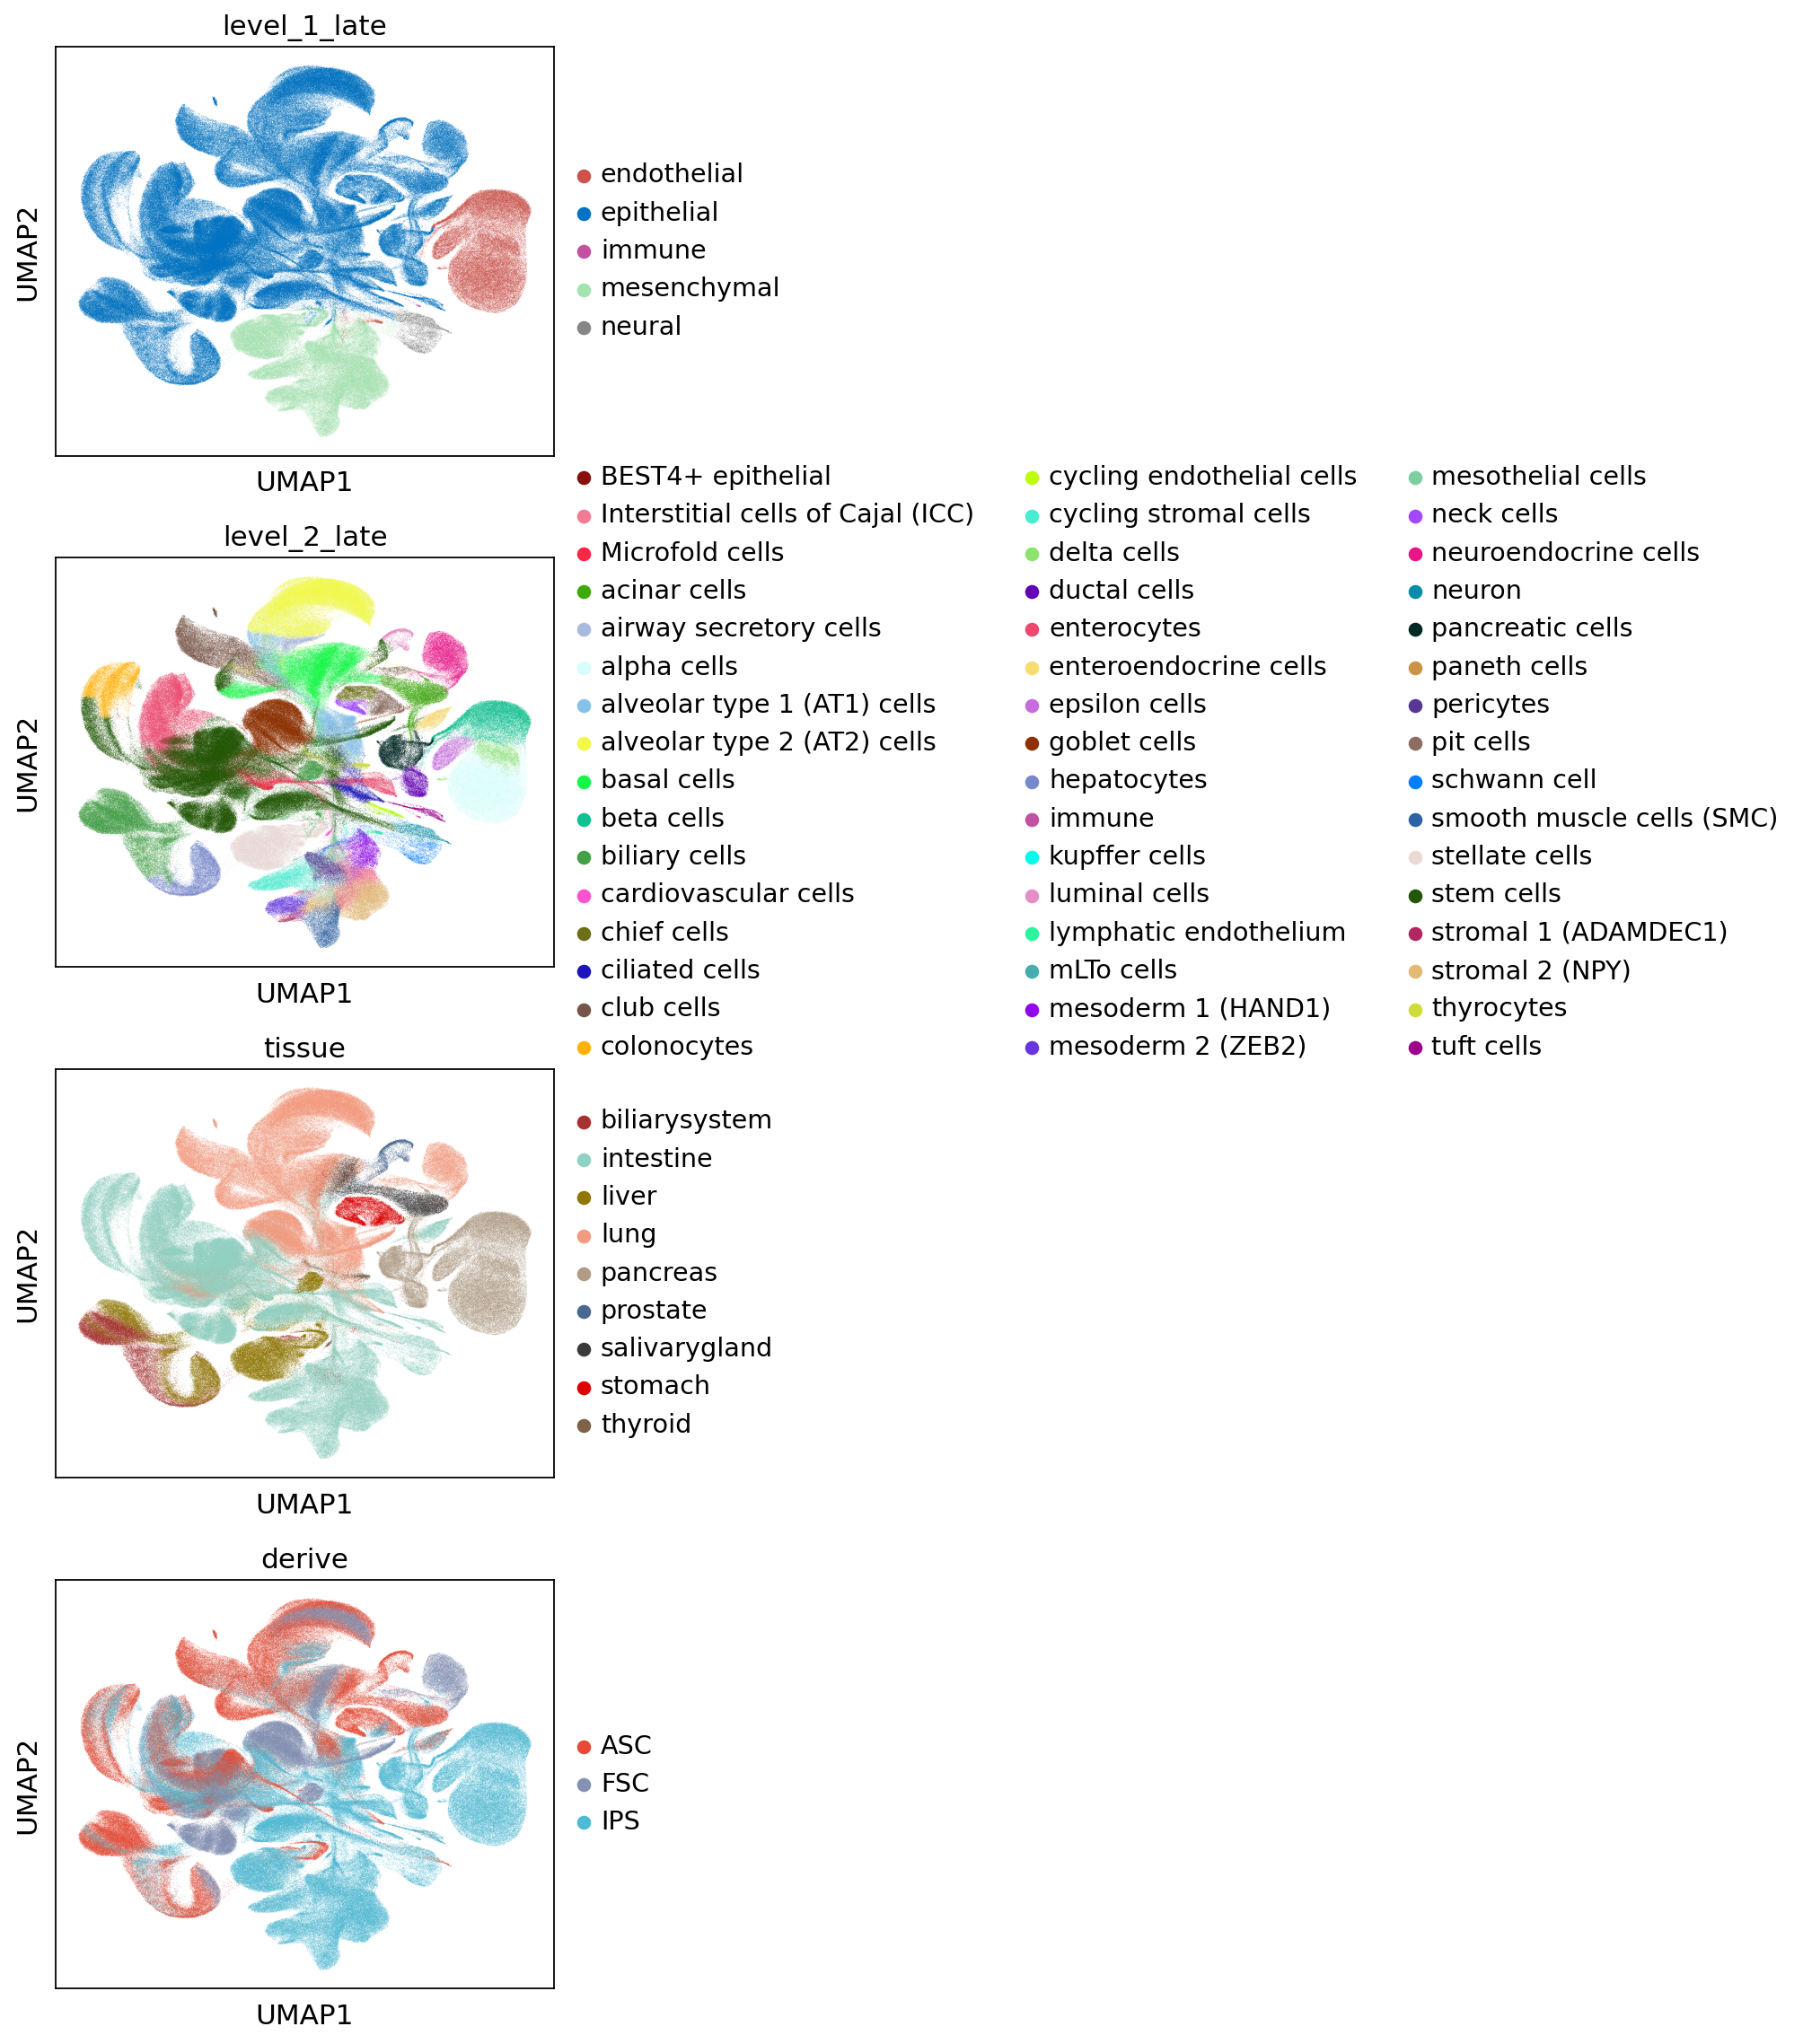

In [8]:
sc.pl.umap(organoid_gex, color = ['level_1_late','level_2_late','tissue' ,'derive'], ncols=1)

In [9]:
organoid_gex.obs.tissue.value_counts()

intestine        353140
lung             225487
pancreas          90618
liver             63319
biliarysystem     36357
salivarygland     15796
stomach           13555
prostate           5375
thyroid            2999
Name: tissue, dtype: int64

In [10]:
pd.crosstab(organoid_gex.obs.derive, organoid_gex.obs.tissue) # tissues to test for DE: biliarysystem, intestine, liver, lung, stomach   

tissue  biliarysystem  intestine  liver    lung  pancreas  prostate  \
derive                                                                
ASC             31347      85529  21746  116133         0      5375   
FSC              1948      76220   7840   75352         0         0   
IPS              3062     191391  33733   34002     90618         0   

tissue  salivarygland  stomach  thyroid  
derive                                   
ASC             15796    10749        0  
FSC                 0        0        0  
IPS                 0     2806     2999

In [11]:
# organoid_gex.X[1:10,1:10].toarray()  # organoid data in X slot is normalised

In [12]:
tissue_latent = sc.read('../../fetal_lung/Roche/cao_fetal_atlas/adata_latent_source.h5ad')

In [13]:
tissue_latent.uns['cell_type_colors'] = tissue_latent.obs.cell_type.cat.categories.map(col_map).tolist()
tissue_latent.uns['tissue_colors'] = tissue_latent.obs.tissue.cat.categories.map(col_map).tolist()
tissue_latent.uns['Main_cluster_name_colors'] = tissue_latent.obs.Main_cluster_name.cat.categories.map(col_map).tolist()

In [14]:
tissue_latent

AnnData object with n_obs × n_vars = 95011 × 10
    obs: 'All_reads', 'Batch', 'Development_day', 'Exon_reads', 'Experiment_batch', 'donor_id', 'Intron_reads', 'Main_cluster_name', 'Organ_cell_lineage', 'RT_group', 'batch', 'n_counts', 'sample', 'BCA_beta', 'BCA_cluster_info', 'MCA_beta', 'Matched_BCA_cell_name', 'Matched_MCA_cell_name', 'sub_cluster_id', 'sub_cluster_name', 'assay_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'suspension_type', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_mribo', 'pct_counts_mribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes'
    uns: 'cell_type_colors'

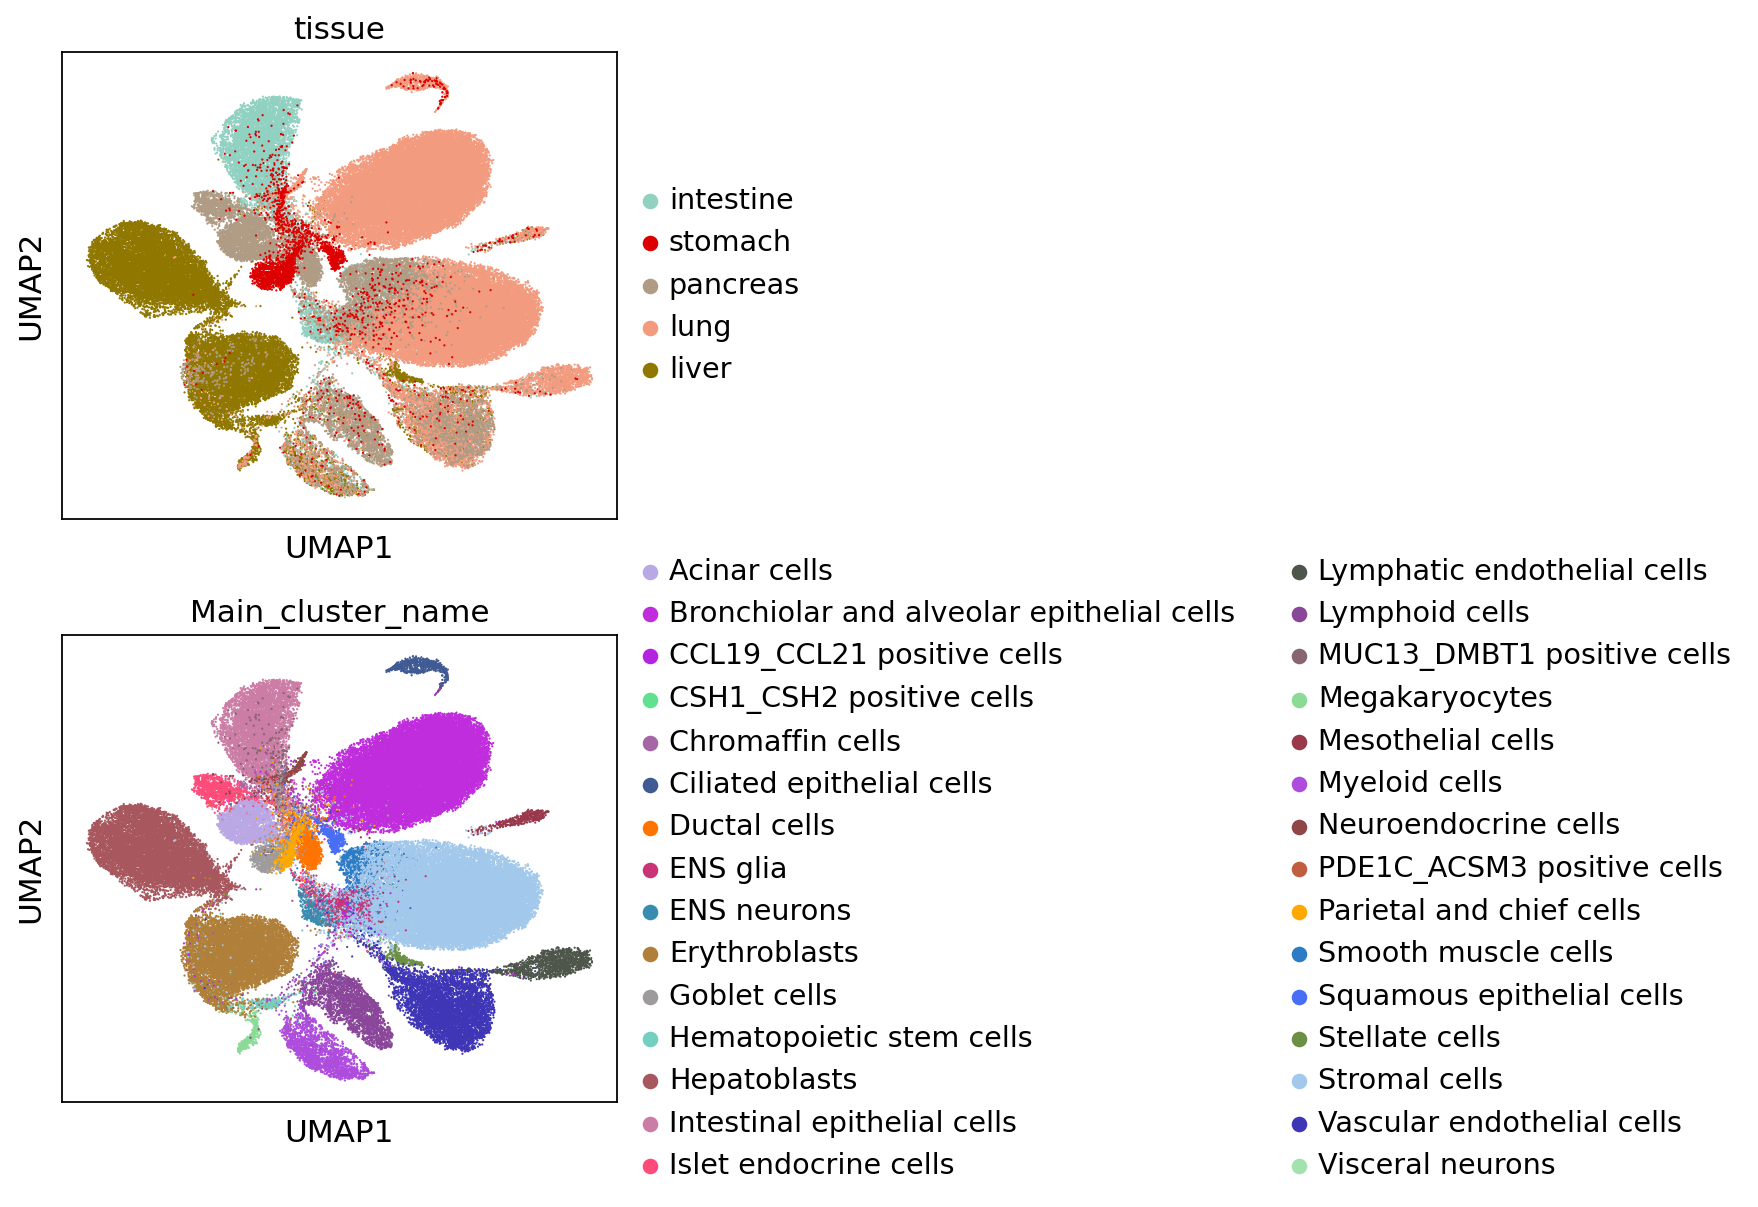

In [15]:
sc.pl.umap(tissue_latent,  color=['tissue','Main_cluster_name'], ncols = 1, size = 4)

In [16]:
tissue_adata = sc.read('../../fetal_lung/Roche/cao_fetal_atlas/local_1M.h5ad')

In [17]:
tissue_adata.var_names = tissue_adata.var.feature_name.values

/home/theislab/l_zadeh/.conda/envs/r_v4/lib/python3.7/site-packages/anndata/_core/anndata.py:895: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['SNRPGP7', 'C5orf60', 'ARF1P2', 'RP11-67H24.1', 'SLC16A13']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [18]:
tissue_adata.var_names

CategoricalIndex(['SNRPGP7', 'C5orf60', 'ARF1P2', 'RP11-67H24.1', 'SLC16A13',
                  'MIR920', 'MT-TS2', 'MMP25', 'MAPK8IP1', 'FAF1',
                  ...
                  'RP11-545E8.1', 'NRG3', 'CSTA', 'EEF1GP3', 'ERMN', 'CICP5',
                  'CACNG8', 'N4BP1', 'RP11-461L13.5', 'FAM170A'],
                 categories=['7SK_ENSG00000202198', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1', ...], ordered=False, dtype='category', length=46483)

In [19]:
hvg_genes = pd.read_csv('var_names_alltissue_fetal_atlas.csv', header=None) # taken from ref scpoli model; Cao_fetal_atlas

In [20]:
tissue_adata = tissue_adata[tissue_adata.obs_names.isin(tissue_latent.obs_names.tolist()), tissue_adata.var_names.isin(hvg_genes[0].tolist())].copy()

/home/theislab/l_zadeh/.conda/envs/r_v4/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [21]:
tissue_adata

AnnData object with n_obs × n_vars = 95011 × 3000
    obs: 'All_reads', 'Batch', 'Development_day', 'Exon_reads', 'Experiment_batch', 'donor_id', 'Intron_reads', 'Main_cluster_name', 'Organ_cell_lineage', 'RT_group', 'batch', 'n_counts', 'sample', 'BCA_beta', 'BCA_cluster_info', 'MCA_beta', 'Matched_BCA_cell_name', 'Matched_MCA_cell_name', 'sub_cluster_id', 'sub_cluster_name', 'assay_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'suspension_type', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_type_ontology_term_id_colors', 'schema_version', 'title'
    obsm: 'X_global_umap', 'X_main_cluster_umap'

In [22]:
tissue_adata.obsm['X_umap'] = tissue_latent.obsm['X_umap'].copy()

In [23]:
%%R -i organoid_gex
organoid_gex

class: SingleCellExperiment 
dim: 2000 806646 
metadata(9): hvg leiden ... derive_colors tissue_colors
assays(5): X ambiguous counts spliced unspliced
rownames(2000): ADAMTS9-AS2 BHLHE40-AS1 ... ZNF804A ZWINT
rowData names(6): highly_variable means ... highly_variable_nbatches
  highly_variable_intersection
colnames(806646): AAACCTGAGCCACGTC-0 AAACCTGAGTATGACA-0 ...
  TTTGTTGGTTTCAGGA-1-217 TTTGTTGGTTTCCTCC-1-217
colData names(38): initial_size_spliced initial_size_unspliced ...
  level_2_late level_3_late
reducedDimNames(4): X_scPoli UMAP X_umap_min X_umap_sc
altExpNames(0):


In [24]:
%%R -i tissue_adata
tissue_adata

class: SingleCellExperiment 
dim: 3000 95011 
metadata(3): cell_type_ontology_term_id_colors schema_version title
assays(1): X
rownames(3000): CXCL10 ARL5C ... CSTA ERMN
rowData names(4): feature_is_filtered feature_name feature_reference
  feature_biotype
colnames(95011): exp7-human-100well.ACAATGCTATACGCGAGATT
  exp7-human-100well.GGTCCTTCTATTCGACCAA ...
  exp7-human-274well.TTCCATCTTTGACCTCTCTG
  exp7-human-274well.CGTCTTCCTGATCGCTTCT
colData names(38): All_reads Batch ... self_reported_ethnicity
  development_stage
reducedDimNames(3): X_global_umap X_main_cluster_umap UMAP
altExpNames(0):


### Compute Neighborhoods 

### Tissue

In [25]:
%%R
library(miloR)
library(scrabbitr)


Loading required package: edgeR
Loading required package: limma

Attaching package: ‘limma’

The following object is masked from ‘package:BiocGenerics’:

    plotMA


Attaching package: ‘edgeR’

The following object is masked from ‘package:SingleCellExperiment’:

    cpm

Loading required package: ggplot2
Loading required package: data.table
data.table 1.14.8 using 2 threads (see ?getDTthreads).  Latest news: r-datatable.com

Attaching package: ‘data.table’

The following object is masked from ‘package:SummarizedExperiment’:

    shift

The following object is masked from ‘package:GenomicRanges’:

    shift

The following object is masked from ‘package:IRanges’:

    shift

The following objects are masked from ‘package:S4Vectors’:

    first, second

Possible Ensembl SSL connectivity problems detected.
Please see the 'Connection Troubleshooting' section of the biomaRt vignette
vignette('accessing_ensembl', package = 'biomaRt')Error in curl::curl_fetch_memory(url, handle = handle) : 
 

In [26]:
%%R
t_milo <- Milo(tissue_adata)
t_milo <- buildGraph(t_milo, k=30, d=2, reduced.dim="UMAP")
t_milo <- makeNhoods(t_milo, prop=0.05, k=30, d=2,refined=T, reduced_dims="UMAP")
t_milo <- buildNhoodGraph(t_milo)

Constructing kNN graph with k:30
Checking valid object
Running refined sampling with reduced_dim
In addition: Warning message:
In (function (to_check, X, clust_centers, clust_info, dtype, nn,  :
  detected tied distances to neighbors, see ?'BiocNeighbors-ties'


In [27]:
%%R
# t_milo <- readRDS("compare_nhoods/comparison_to_fetal_atlas/t_milo.rds")
# o_milo <- readRDS("compare_nhoods/comparison_to_fetal_atlas/o_milo.rds")

NULL


In [28]:
%%R
t_milo

class: Milo 
dim: 3000 95011 
metadata(3): cell_type_ontology_term_id_colors schema_version title
assays(1): X
rownames(3000): CXCL10 ARL5C ... CSTA ERMN
rowData names(4): feature_is_filtered feature_name feature_reference
  feature_biotype
colnames(95011): exp7-human-100well.ACAATGCTATACGCGAGATT
  exp7-human-100well.GGTCCTTCTATTCGACCAA ...
  exp7-human-274well.TTCCATCTTTGACCTCTCTG
  exp7-human-274well.CGTCTTCCTGATCGCTTCT
colData names(38): All_reads Batch ... self_reported_ethnicity
  development_stage
reducedDimNames(3): X_global_umap X_main_cluster_umap UMAP
altExpNames(0):
nhoods dimensions(2): 95011 4582
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 4582
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 4582 4582


In [29]:
%%R
suppressPackageStartupMessages(library(ggraph))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(jsonlite))
suppressPackageStartupMessages(library(ggrastr))
suppressPackageStartupMessages(library(ggridges))
suppressPackageStartupMessages(library(ggalluvial))
suppressPackageStartupMessages(library(ggrepel))

In [30]:
sc.set_figure_params(dpi=300)
sc.set_figure_params(figsize=(5, 12))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


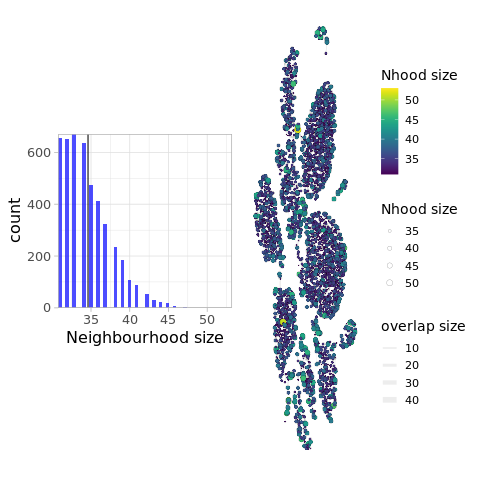

In [31]:
%%R

options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 300)

p1 <- scrabbitr::plotNhoodSizeHist(t_milo, colour="blue")
#ggsave("../plots/compare_nhoods/r_milo_nhood_size_hist.pdf", p1, width=4, height=4, dpi=300)

p2 <- plotNhoodGraph(t_milo, size_range=c(0.1,3), node_stroke=0.1) + 
scale_fill_viridis(name = "Nhood size", option = "viridis", direction = 1) 
#ggsave("../plots/compare_nhoods/r_nhood_size_graph.pdf", p2, width=6, height=5, dpi=300)

grid.arrange(p1, p2, nrow=1)

### Organoid

In [32]:
%%R
# Compute organoid neighbourhoods 
o_milo <- Milo(organoid_gex)


In [33]:
%%R
o_milo <- buildGraph(o_milo, k=30, d=2, reduced.dim="UMAP")

Constructing kNN graph with k:30


In [34]:
%%R
o_milo <- makeNhoods(o_milo, prop=0.05, k=30, d=2,refined=T, reduced_dims="UMAP")

Checking valid object
Running refined sampling with reduced_dim
In addition: Warning message:
In (function (to_check, X, clust_centers, clust_info, dtype, nn,  :
  detected tied distances to neighbors, see ?'BiocNeighbors-ties'


In [35]:
%%R
o_milo <- buildNhoodGraph(o_milo)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


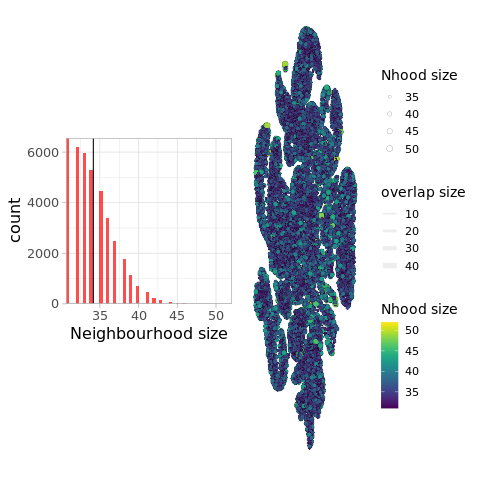

In [36]:
%%R
# Plot nhoods and size distribution
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 300)

p3 <- plotNhoodSizeHist(o_milo, colour="red")
#ggsave("../plots/compare_nhoods/m_milo_nhood_size_hist.pdf", p3, width=4, height=4, dpi=300)

p4 <- plotNhoodGraph(o_milo,size_range=c(0.1,3) ,node_stroke=0.1) + 
scale_fill_viridis(name = "Nhood size", option = "viridis", direction=1)
#ggsave("../plots/compare_nhoods/m_nhood_size_graph.pdf", p4, width=6, height=5, dpi=300)

grid.arrange(p3, p4, nrow = 1)

In [37]:
%%R
o_milo

class: Milo 
dim: 2000 806646 
metadata(9): hvg leiden ... derive_colors tissue_colors
assays(5): X ambiguous counts spliced unspliced
rownames(2000): ADAMTS9-AS2 BHLHE40-AS1 ... ZNF804A ZWINT
rowData names(6): highly_variable means ... highly_variable_nbatches
  highly_variable_intersection
colnames(806646): AAACCTGAGCCACGTC-0 AAACCTGAGTATGACA-0 ...
  TTTGTTGGTTTCAGGA-1-217 TTTGTTGGTTTCCTCC-1-217
colData names(38): initial_size_spliced initial_size_unspliced ...
  level_2_late level_3_late
reducedDimNames(4): X_scPoli UMAP X_umap_min X_umap_sc
altExpNames(0):
nhoods dimensions(2): 806646 38961
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 38961
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 38961 38961


In [38]:
%%R
t_milo

class: Milo 
dim: 3000 95011 
metadata(3): cell_type_ontology_term_id_colors schema_version title
assays(1): X
rownames(3000): CXCL10 ARL5C ... CSTA ERMN
rowData names(4): feature_is_filtered feature_name feature_reference
  feature_biotype
colnames(95011): exp7-human-100well.ACAATGCTATACGCGAGATT
  exp7-human-100well.GGTCCTTCTATTCGACCAA ...
  exp7-human-274well.TTCCATCTTTGACCTCTCTG
  exp7-human-274well.CGTCTTCCTGATCGCTTCT
colData names(38): All_reads Batch ... self_reported_ethnicity
  development_stage
reducedDimNames(3): X_global_umap X_main_cluster_umap UMAP
altExpNames(0):
nhoods dimensions(2): 95011 4582
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 4582
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 4582 4582


In [39]:
%%R
## counts(o_milo) <- assays(o_milo)[['X']] # count assay already exists
assay(o_milo, "logcounts") <- assays(o_milo)[['X']]

In [40]:
%%R
assay(t_milo, "logcounts") <- assays(t_milo)[['X']]

In [41]:
%%R
# o_milo

assay(o_milo, "logcounts")[1:10,1:10]

10 x 10 sparse Matrix of class "dgCMatrix"
                                                                      
ADAMTS9-AS2 .        .        . .         .         .         .       
BHLHE40-AS1 .        .        . .         .         .         .       
CARMN       .        .        . .         .         .         .       
CASC15      .        .        . .         .         .         .       
CASC19      1.436794 1.483229 . 0.5327907 2.1519985 2.0390751 1.522295
CDKN2B-AS1  .        .        . .         .         .         .       
CRNDE       .        .        . 0.5327907 0.6679597 0.5553846 1.382690
CYTOR       0.956892 1.483229 . 0.8785309 .         1.6966547 1.026531
DNM3OS      .        .        . .         .         .         .       
DRAIC       .        .        . .         .         .         .       
                                       
ADAMTS9-AS2 .         .        .       
BHLHE40-AS1 .         .        .       
CARMN       .         .        .       
CASC15      .   

  [[ suppressing 10 column names ‘AAACCTGAGCCACGTC-0’, ‘AAACCTGAGTATGACA-0’, ‘AAACCTGCACACATGT-0’ ... ]]


In [42]:
%%R
assay(t_milo, "logcounts")[1:200,1:10]

200 x 10 sparse Matrix of class "dgCMatrix"
                                                                   
CXCL10       .       . . .  .         .        .        .       . .
ARL5C        .       . . .  .         .        .        .       . .
MYOCD        .       . . .  .         .        .        .       . .
AC005616.1   .       . . .  .         .        .        .       . .
CDT1         .       . . .  .         .        .        .       . .
C16orf74     .       . . .  .         .        .        .       . .
TTC39A-AS1   .       . . .  .         .        .        .       . .
VGLL3        .       . . .  .         .        .        .       . .
TMPRSS11A    .       . . .  .         .        .        .       . .
PNPO         .       . . .  .         .        .        .       . .
IGFLR1       .       . . .  .         .        .        .       . .
CALML3       .       . . .  .         .        .        .       . .
MYRF         .       . . .  .         .        .        .       . .
LINC

  [[ suppressing 10 column names ‘exp7-human-100well.ACAATGCTATACGCGAGATT’, ‘exp7-human-100well.GGTCCTTCTATTCGACCAA’, ‘exp7-human-100well.GTCCTGCATACGAAGTCAA’ ... ]]


### Run neighbourhood comparison pipeline

In [43]:
%%R
head(rownames(t_milo))

[1] "CXCL10"     "ARL5C"      "MYOCD"      "AC005616.1" "CDT1"      
[6] "C16orf74"  


In [44]:
%%R
head(rownames(o_milo))

[1] "ADAMTS9-AS2" "BHLHE40-AS1" "CARMN"       "CASC15"      "CASC19"     
[6] "CDKN2B-AS1" 


Computing Nhood similarities based on 2k genes, since organoid data is 2k. 

In [45]:
# union of genes ?

In [46]:
%%R
# Run pipeline
out <- scrabbitr::calcNhoodSim(t_milo, o_milo, orthologs= cbind(rownames(o_milo), rownames(o_milo)) ,
                               sim_preprocessing="gene_spec", sim_measure="pearson",
                               hvg_join_type="intersection", max_hvgs=2000, 
                               export_dir = "compare_nhoods/all_organoid_analyses", 
                               verbose = TRUE)

Selecting features...
Combining features...
Averaging expression across neighbourhoods...
Computing similarity across neighbourhoods...
Exporting results...
In addition: Warning message:
In cor(as.matrix(r_vals), as.matrix(m_vals), method = sim_measure) :
  the standard deviation is zero


In [47]:
%%R
saveRDS(out, "compare_nhoods/comparison_to_fetal_atlas/all_organoids_scrabbitr_out.rds")
# out <- readRDS("compare_nhoods/comparison_to_fetal_atlas/all_organoids_scrabbitr_out.rds")

In [48]:
%%R
names(out)

[1] "r_vals"    "m_vals"    "nhood_sim"


In [49]:
%%R
# head(colData(t_milo))

NULL


In [50]:
%%R
# colData(t_milo)$Main_cluster_name <- as.character(colData(t_milo)$Main_cluster_name)

NULL


In [51]:
%%R

# Extract neighbourhood graph
t_graph <- nhoodGraph(t_milo)
o_graph <- nhoodGraph(o_milo)

# Add nhood attributes to igraph
t_nhoodIDs <- as.numeric(vertex_attr(t_graph)$name) 
t_indCells <- colnames(t_milo)[t_nhoodIDs]

V(t_graph)$cell_name <- t_indCells
V(t_graph)$celltype <- colData(t_milo)[t_indCells, "Main_cluster_name"]

o_nhoodIDs <- as.numeric(vertex_attr(o_graph)$name) 
o_indCells <- colnames(o_milo)[o_nhoodIDs]

V(o_graph)$cell_name <- o_indCells
V(o_graph)$celltype <- colData(o_milo)[o_indCells, "level_2_late"]

In [52]:
%%R
table(is.na(V(t_graph)$celltype))


FALSE 
 4582 


In [53]:
%%R
t_milo

class: Milo 
dim: 3000 95011 
metadata(3): cell_type_ontology_term_id_colors schema_version title
assays(2): X logcounts
rownames(3000): CXCL10 ARL5C ... CSTA ERMN
rowData names(4): feature_is_filtered feature_name feature_reference
  feature_biotype
colnames(95011): exp7-human-100well.ACAATGCTATACGCGAGATT
  exp7-human-100well.GGTCCTTCTATTCGACCAA ...
  exp7-human-274well.TTCCATCTTTGACCTCTCTG
  exp7-human-274well.CGTCTTCCTGATCGCTTCT
colData names(38): All_reads Batch ... self_reported_ethnicity
  development_stage
reducedDimNames(3): X_global_umap X_main_cluster_umap UMAP
altExpNames(0):
nhoods dimensions(2): 95011 4582
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 4582
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 4582 4582


In [54]:
%%R
out$nhood_sim

             491647        521664        317908        138869        295084
81025  0.1104209841 -2.108283e-02 -8.500277e-02  9.271341e-02 -1.423286e-02
17270  0.0992893172  8.002902e-02  8.553626e-02 -5.796168e-02 -2.754271e-03
             586381         92481        396318        764786        416672
81025  3.783285e-02  1.731557e-02  0.0468261564 -5.839869e-02 -5.859653e-02
17270 -6.462543e-02 -3.876962e-02 -0.0435178956 -5.564212e-02 -1.152217e-02
             514967        646518        349532        638062        449992
81025  2.773105e-02  1.415306e-01 -6.602648e-03  1.006573e-01 -1.648554e-02
17270 -3.076514e-02  1.085729e-01 -4.484726e-02  3.961522e-02  5.604978e-02
             568058        668179         43721        514486         70808
81025  1.383067e-01 -4.978921e-02  2.562196e-03  1.988909e-01 -1.180308e-02
17270  1.115670e-01 -5.168598e-02 -6.340594e-02  1.295894e-01 -4.652254e-02
             574508        761058        473823        334458        529862
81025  0.146

81025 -8.608334e-03  1.437794e-01 -0.0734964627  3.660334e-02  6.911383e-02
17270 -6.595265e-02  1.844919e-03  0.0605370502 -6.330650e-02  2.906174e-02
             377959        278385        398891        244223        255432
81025  9.984268e-02 -6.095824e-02 -5.706538e-02  1.136810e-01 -6.382469e-02
17270 -8.429989e-02  1.344038e-01 -7.997429e-02  1.986705e-02  2.981201e-02
             223736        337398        188637        285862        588672
81025  5.816442e-02 -8.409239e-02 -7.606246e-02 -0.0761169167  3.121752e-02
17270 -4.016428e-02  1.531486e-01  8.855640e-02  0.1323201830 -6.879998e-02
             434226        637217         81300        564310         34890
81025 -7.132494e-02  3.398913e-02  0.0123934610  2.640153e-01  3.535151e-02
17270 -6.591830e-02  2.949194e-02 -0.0524743626  7.566864e-02 -4.523365e-02
             444063        564685        696770        554876        316984
81025  6.310514e-02  1.107017e-01 -2.708472e-02  1.791515e-01 -7.268687e-02
17270 -1.301

17270 -6.923009e-02 -4.051680e-02 -5.431243e-02 -6.788393e-02 -3.050331e-02
             628203        796783        778866        718145         91865
81025  4.574490e-02 -2.370028e-02 -6.135505e-02  9.009750e-02  6.785415e-02
17270 -4.464815e-02 -4.819949e-02 -6.029736e-02 -2.345616e-02 -3.390827e-02
             746094        168352        103697        319252        355913
81025 -4.674649e-02  5.331882e-02  1.348678e-02  5.384008e-02  3.174039e-02
17270 -4.289793e-02 -2.451440e-02 -1.516181e-02 -3.134766e-02 -6.638866e-02
              27895        399606        302427        574332        619226
81025  6.009032e-03 -5.379941e-02 -8.602312e-02  1.420789e-02  0.1148860480
17270 -7.139047e-02 -1.065373e-01  8.363847e-02 -3.726570e-02  0.0369404176
             145534        200527        628744        708846        258099
81025  1.817122e-02  2.004236e-01 -9.593501e-03  0.0924721755  2.105846e-01
17270 -2.193852e-02 -4.356429e-02 -6.630072e-02 -0.0116848564  1.098165e-01
            

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



             717130        613290        797285        104545        394835
81025  7.998044e-02  1.183716e-01 -5.703839e-02  4.827839e-02  0.0631131373
17270 -2.759905e-02  1.236760e-02 -5.314264e-02 -2.304436e-02 -0.0352387367
                829        347448        220237        106268        461806
81025  7.006285e-02  2.721478e-02 -0.0767486989  6.384999e-02  2.785754e-01
17270 -4.879747e-02 -4.225071e-02  0.0979570424  4.061325e-03  8.453269e-03
             682718        546477        136864        776315        259677
81025  0.1121638899 -2.133761e-03  1.322331e-01 -3.202193e-02  3.018204e-02
17270  0.0039567198 -7.913356e-02 -5.094864e-02 -5.303394e-02 -6.543189e-02
             137088        218287        344482        274099        792114
81025  0.0961568758 -6.633366e-02 -7.917182e-02 -5.767423e-02 -7.375654e-02
17270 -0.0278706377  8.209188e-02  1.119870e-01  2.267145e-02 -3.275130e-02
             453835        184393        303106        253817        303244
81025 -1.069

81025  1.381191e-02 -5.231283e-03 -6.581224e-02 -5.995658e-03  3.606226e-02
17270 -3.655951e-02 -6.731823e-02 -6.656298e-02 -7.433307e-02 -5.663573e-02
             135772        272470        273103        601153        541952
81025  1.095714e-01 -5.999658e-02 -4.035815e-02  0.1133798286  1.082303e-01
17270 -4.780917e-02  3.220063e-02 -2.879032e-02  0.0483548647 -7.095080e-03
               5318        420587        678142        746797        341678
81025  1.089577e-01 -5.050131e-02 -4.870582e-02 -6.256564e-02  3.731849e-02
17270 -6.516276e-02 -6.997821e-02 -5.362710e-02  3.669066e-03 -6.326357e-02
             492957        704378        733519        391046        709639
81025  9.959438e-02 -1.002172e-02  4.730081e-02  4.951887e-02  1.030692e-01
17270  1.743861e-01 -9.276285e-02 -3.036272e-02 -2.751422e-02  3.822625e-02
             267686        122044        634341        677288        145627
81025 -7.803404e-02  3.983961e-02  2.284235e-02  2.502700e-01  2.876331e-02
17270  1.181

17270 -0.0441156837 -2.756354e-02 -1.063221e-01  0.1810580506 -2.548233e-02
             520201        287689        371230        372150        400817
81025 -1.987476e-02 -7.944206e-02 -2.793974e-02  5.683086e-02  1.195650e-01
17270  6.774824e-02  9.265535e-02 -6.756103e-02 -4.968969e-02 -6.876695e-02
             747644          2393        551184        664172        309217
81025 -4.276009e-02  1.199048e-01  5.836128e-02 -3.498751e-02  1.645404e-01
17270 -5.244522e-02 -4.983546e-02 -1.740712e-03 -5.162539e-02  8.988128e-04
             178150        350980         73337        615380        619063
81025 -2.436186e-02  2.563893e-02  0.0917495733  1.206281e-01  6.718693e-02
17270  8.904354e-02 -5.885874e-02 -0.0480525938 -9.593512e-03  2.017238e-02
             332811        432263        656455        223575        682950
81025  2.426591e-02 -1.911064e-02  3.565708e-02  6.187554e-02  0.1767998954
17270 -4.630921e-02 -3.169013e-02  4.026120e-02 -4.030977e-02 -0.0090277042
            

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -1.509113e-02 -3.669024e-02 -0.0172350426
             296583        330926         14937        364356         40734
81025 -6.659093e-02 -8.036086e-02  1.198871e-01  7.031637e-03  1.651137e-02
17270  9.063889e-02  6.337988e-02 -4.700750e-02 -5.100984e-02 -4.108248e-02
               8850        558513        520388         69627        357943
81025 -4.231432e-02  2.157177e-01 -1.926202e-03  8.612206e-02 -1.507013e-02
17270 -1.055779e-01  7.918427e-02  2.042940e-03 -3.602281e-02 -9.119877e-02
             192019        543347         79534        611463        496706
81025 -5.939751e-02  7.242459e-03  1.206102e-02  0.1432409926  1.797700e-01
17270  1.040806e-01 -9.853779e-02 -4.153532e-02 -0.0100381646 -3.148803e-02
             540089        773354        220588         52824         40424
81025  5.388132e-02 -5.103880e-02 -5.427799e-02  4.426096e-03  6.164293e-02
17270  1.779823e-02 -4.806050e-02  1.346759e-01 -5.004781e-02 -3.959936e-02
             392779        394740        3070

81025 -4.597598e-02  5.258073e-02 -5.412560e-02  1.143152e-01  8.229328e-02
17270 -8.702998e-02 -4.221612e-02 -5.472936e-03  8.136009e-03 -6.186923e-02
             382296        567275        713251        285961        759080
81025 -8.908085e-02  2.545839e-01  8.019635e-02  2.328741e-01 -4.817741e-02
17270  2.677316e-02  3.068374e-02 -3.000133e-02 -2.946812e-03 -4.610506e-02
             112184        383279        302967        711582         99510
81025  5.062486e-02 -2.798866e-02 -5.575092e-02 -7.499098e-02 -4.445481e-03
17270 -3.850704e-02 -1.013962e-01  1.302770e-02  7.992989e-02 -4.754231e-02
             610506        684562         28589        160099        260236
81025  0.1153368643  1.255485e-02  1.807611e-01  7.302702e-02 -7.831735e-02
17270  0.0023587365 -8.400426e-02 -3.073505e-02 -2.186098e-03  1.447473e-01
             457052        221470        497048        265189        533340
81025  1.459148e-02  4.753220e-02  2.456771e-01 -7.756266e-02  2.074917e-01
17270  9.734

17270  1.245877e-01 -4.959965e-02 -5.583012e-02 -1.648502e-02  0.0263421741
             643641        715242         60172         91829        229279
81025  0.0401953608  0.1053101132 -1.173876e-02 -3.458686e-02  7.014099e-02
17270 -0.0514822278 -0.0587554136 -6.506259e-02 -5.874105e-02  5.504094e-02
             441650        443469        541132        421859        273865
81025  2.065557e-01  3.635996e-02  9.361116e-02 -7.946017e-02  5.723976e-02
17270  1.832748e-01 -5.869179e-02  1.106778e-02  5.225593e-02 -7.600825e-03
             462034        646741         24152        347657        146751
81025  2.796032e-01  1.022017e-01  7.635302e-02 -4.460567e-03  1.149534e-02
17270 -1.832659e-02  1.484430e-01 -8.041441e-02 -4.948993e-02 -2.852925e-02
             212362        106563        778646        470380        334053
81025 -2.762049e-02  5.617412e-02 -6.311923e-02  3.359052e-01  5.692070e-02
17270  1.488032e-01 -3.757579e-03 -5.569763e-02 -4.356260e-03 -1.035661e-02
            

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  3.522140e-02  8.746482e-02 -5.537315e-02  4.394121e-02  0.2531471145
17270 -7.335946e-02 -6.506630e-02 -5.732191e-02  6.014875e-02  0.0700733022
             315326        621528        736545         58319          2678
81025 -6.322143e-02  9.999812e-02  4.718665e-02  1.725701e-02  8.546762e-02
17270  5.375408e-02  4.967469e-03 -4.791079e-02 -4.652575e-02 -6.134831e-02
             669738        804398        531235         40150        579393
81025 -1.926517e-02 -6.069126e-02  1.973908e-01  5.327192e-02  4.016724e-02
17270 -5.249659e-02 -4.730883e-02  7.269116e-02 -4.652321e-03 -5.516065e-02
             561242        128312        760456        715627        576011
81025  2.956909e-01  4.467509e-02 -4.511930e-02  0.0748162549  2.182744e-02
17270 -2.624428e-02 -5.286884e-02 -6.439486e-02 -0.0416447470 -6.728616e-02
             288339        715889        218663        673321        420796
81025 -8.282873e-02  7.619107e-02 -0.0893002592  2.492078e-01 -6.704681e-02
17270  7.041536e-

17270  9.177865e-02 -3.030483e-02  8.396939e-02 -5.940992e-02 -7.904271e-02
             751834        170315        778279        600672        679811
81025 -0.0549420896  2.280579e-02 -4.429032e-02  3.876634e-02  1.408066e-01
17270 -0.0602968029 -4.970005e-02 -4.290321e-02 -4.955654e-02 -5.759807e-02
             310206         19748        740957        249998        186182
81025  2.895222e-02  3.722117e-02 -4.330767e-02  1.294566e-01 -0.0862311774
17270 -5.340113e-02 -4.195149e-02  5.677032e-03  6.918498e-02  0.0052435641
             574548        108857        750888        359121        524730
81025  1.951158e-02  1.039884e-01 -5.680598e-02 -4.022285e-02 -2.349940e-02
17270 -6.711869e-02 -2.286928e-02 -4.642814e-02 -6.169446e-02  8.012733e-02
             282581        239126        432863        516406        801955
81025  9.730871e-02  0.1295942660 -6.910223e-02  0.2319774021 -4.871737e-02
17270 -2.366351e-02  0.0387601383  2.864143e-02  0.1814003563 -5.019054e-02
            

             122845        234613        548304        754242        733126
81025  7.523752e-02  1.114099e-01  3.901455e-02 -4.768245e-02  0.0351399479
17270 -8.073278e-03  3.079468e-02  5.890448e-02 -4.217664e-02 -0.0390131276
             754034        680894         13693        372868        171594
81025 -6.058071e-02  1.563385e-01  1.041152e-01  1.181212e-04 -7.320081e-02
17270 -2.567055e-02 -3.858702e-02 -5.772911e-02 -1.734049e-02  8.187617e-02
             438073        390189        176397         41395         66459
81025  0.0464830811  3.165597e-02 -8.445980e-02 -5.884746e-02  7.393051e-02
17270 -0.0664727006 -3.716511e-02  1.599469e-01 -4.012728e-02  6.707437e-03
              42853        246935        479211         97914        784566
81025  1.703198e-02  1.303748e-01  2.187679e-01  2.529775e-02 -2.144611e-02
17270 -3.225487e-02  4.899961e-02  1.556636e-01 -5.881231e-03 -5.168734e-02
             101926        426987        719309        278174        649188
81025 -5.426

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  1.404865e-01 -9.023045e-03  1.447761e-01
             434093        371574         72394        641840        543766
81025  9.534735e-03 -8.056730e-03  7.026349e-02  3.407728e-03  8.159540e-03
17270  4.126019e-02 -2.821626e-03 -4.322629e-02 -7.815851e-02 -1.040853e-01
             761862        293762         50660        533529        350370
81025 -5.587231e-02 -8.218009e-02  5.115252e-02  4.951340e-02  1.713786e-02
17270 -6.014059e-02  1.762691e-01 -5.962305e-02  1.608893e-02 -5.498180e-02
             541182        255385         58262        358955        739614
81025  7.494692e-02  1.855237e-01  9.494797e-02 -5.436102e-02  4.011546e-02
17270  5.842026e-03  6.877025e-02 -2.576323e-02 -1.130176e-01 -4.304546e-02
             461405        693831        340847        166894        566823
81025  1.292673e-01  3.188856e-02  1.061537e-02  3.413332e-02  3.222419e-01
17270  1.151764e-01 -8.057068e-02 -4.005792e-02 -2.197983e-02  1.317305e-02
             290011        464166        3925

81025 -7.557231e-02 -1.758188e-02  3.038024e-02  1.025048e-03  1.181667e-01
17270  1.256146e-01 -7.679336e-02 -4.150211e-02 -5.191698e-02  1.593376e-02
             154732        631544        375349        611290        169928
81025  5.891911e-02  1.549098e-01  1.410308e-01  2.809422e-02 -8.467624e-03
17270  4.389804e-02 -7.352784e-03 -6.791711e-02 -1.985501e-02 -4.593967e-02
             627910        268701        766819        740492        677398
81025  9.045461e-02 -2.591261e-02 -5.770168e-02  1.208670e-01  0.2521677635
17270 -2.287228e-02 -5.878513e-02 -4.109848e-02 -2.707503e-02 -0.0026615308
             702489        420849        479335        733947        117539
81025 -1.369459e-02 -6.642984e-02  2.164552e-01  6.779283e-02  7.166592e-03
17270 -9.930119e-02  3.915070e-02  9.296098e-02 -5.214792e-03 -3.232320e-02
             271203        501219        196197        271814        452047
81025  1.507414e-02  0.2032848104 -0.0342189798 -7.755270e-03  7.313720e-02
17270 -4.238

17270 -2.384782e-02  9.191803e-02 -5.827091e-02 -4.736816e-02 -5.626819e-02
             502525        401399         63187        277977        392967
81025  8.669491e-02  0.0369111252  3.901899e-02 -8.280294e-03  4.343925e-02
17270  6.685473e-02  0.0795423964 -3.466974e-02 -3.702350e-02 -2.950924e-02
             455669        801380        642448        188443        651558
81025  2.580520e-02 -6.563959e-02  1.178180e-03 -9.471421e-02  6.195780e-02
17270  2.004726e-02 -1.394527e-02 -8.558028e-02  1.469620e-01  1.205587e-01
             350113        149537        577015         17693        297462
81025  0.0131595621  4.232132e-02  7.692684e-03 -4.697839e-02  3.208402e-02
17270 -0.0536028093 -2.499007e-02 -8.140415e-02 -8.225340e-02 -4.772252e-02
             508705          1164        366508        129262         78735
81025  2.572136e-01  8.556354e-02 -5.084408e-02  5.965737e-02  5.553290e-02
17270  1.531363e-01 -7.452723e-02 -1.127613e-01 -2.157150e-02 -4.949637e-02
            

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        241053        352311
81025 -7.850727e-02 -7.991859e-02  2.133461e-01  0.0639048697  2.324006e-02
17270  1.424420e-01  6.006750e-02  1.418267e-01 -0.0632705618 -4.483632e-02
             638309        525571        110341        483984        154702
81025  8.875446e-02 -2.685225e-02 -8.898170e-02  0.2371894423  6.153916e-02
17270  8.223208e-02  9.470891e-02  1.208320e-01  0.0583766999  3.257009e-02
             537373        707377        696463        405240        622754
81025  1.343198e-01  1.031654e-01  5.873363e-02 -6.237868e-02  1.229763e-01
17270  1.579477e-02  1.022902e-02 -7.184518e-02  1.433984e-02  4.886852e-02
             123854        363658         47192        542670        538702
81025  6.604717e-02 -2.137945e-03  1.232105e-02  9.063865e-02  9.280819e-02
17270 -3.184742e-02 -3.699675e-02 -6.004190e-02 -5.186833e-02  6.657867e-02
             396267        747684         62839        316701        244848
81025  2.962971e-02 -5.258499e-02  1.744900e-02 -9.143268e-

17270 -2.709468e-02 -3.329117e-02 -6.364801e-02 -3.018653e-02  1.513659e-01
             289778        469769        224873        713425        664102
81025  3.261657e-02  3.538565e-01 -7.007500e-02  1.131240e-01 -5.381411e-02
17270 -1.548372e-02 -3.729736e-02  2.410898e-03 -3.803989e-02 -5.205505e-02
             269405        570986        114876        450353        678773
81025 -7.617609e-02  3.439036e-01  4.090507e-03 -0.0192365343  9.467209e-02
17270  1.724494e-01 -1.484491e-02 -3.799306e-02  0.1067279629  4.894084e-02
             658631         23451        406044         57861         26452
81025  1.211571e-01  7.384940e-02 -9.419043e-02  3.434563e-02 -4.769307e-02
17270  4.892018e-02 -7.017207e-02 -4.306745e-02 -2.635823e-02 -1.133871e-01
             416233        109533        566016        693328        161869
81025  1.255739e-01  0.0553943170  3.035551e-01 -0.0132727368  6.089245e-02
17270  8.307976e-02 -0.0064550186  4.251086e-02 -0.0876950909  2.215701e-02
            

             567846        490946        781356        588928        238074
81025  1.448880e-01  2.011156e-01 -3.475168e-02  3.065800e-02  1.419581e-01
17270  4.021307e-02  1.328680e-01 -4.961294e-02 -6.157555e-02  8.795390e-02
             473587        314663        354110        156136        246688
81025  3.236728e-01 -1.330809e-02 -6.639327e-03  6.461372e-02  1.342108e-01
17270 -2.346130e-02 -3.327067e-02 -4.397150e-02  1.878151e-02  2.430287e-02
             679506        752558        214275        498525         51027
81025  1.569342e-01 -5.365956e-02 -7.348133e-02  0.2002684069  2.677653e-02
17270 -5.405895e-02 -4.692470e-02  1.010490e-01  0.0535134847 -5.894834e-02
             553165        173053         89603        524497        257890
81025  2.871044e-02  6.049823e-02  6.152578e-02 -1.157913e-02  2.007672e-01
17270  2.535527e-02 -7.645410e-03 -4.372354e-02  1.800379e-02  1.384208e-01
             451149        533611        230217        274540        497371
81025  0.024

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -5.229670e-02
             294102        152956        357842        554535         90270
81025  4.212336e-02  1.379828e-02 -2.580496e-02  1.035761e-01  7.666331e-02
17270 -5.140811e-03 -2.410819e-02 -5.295978e-02  1.509430e-01 -1.863285e-02
             260909        152233        332881        409196        479914
81025 -7.513581e-02 -5.314281e-03  3.692818e-02  0.2828923466  1.978181e-01
17270  1.145041e-01 -9.476067e-02 -1.721320e-02 -0.0347801233  7.109796e-02
             278728        510594        626230        383486        242702
81025 -6.787917e-02  0.1084637723  1.377476e-01  5.933685e-02  1.391731e-01
17270  1.559870e-01  0.1175205212  2.663854e-02 -1.044499e-01  4.496072e-02
             775602        508780        215676        135144        311197
81025 -5.075590e-02  2.295073e-01 -7.454563e-02  7.832766e-02 -8.354245e-02
17270 -4.061218e-02  1.905483e-01  3.549777e-02 -3.629195e-02 -4.901891e-02
             388352        315729        716742        572422        6752

81025  1.225549e-01 -1.035467e-02  1.628783e-01  0.1756692032 -6.067715e-02
17270 -2.465649e-02  4.357591e-02  8.121202e-02 -0.0486155497  1.750257e-01
             177071        404031        124309         52747        290781
81025  8.685204e-02 -5.775888e-02 -1.277687e-02  0.0671402314  3.865631e-02
17270 -3.332132e-02  1.274194e-02 -5.547812e-02 -0.0516999974  5.163407e-03
              22855        777717        666058         47817        241022
81025  1.297463e-01 -4.411529e-02 -3.438562e-02  2.378664e-02  1.444198e-01
17270 -5.413669e-02 -4.334134e-02 -3.951810e-02 -5.952293e-02  5.933039e-02
              78503         66074         30895        280146        682015
81025 -6.669085e-03  3.081944e-02  9.942938e-02 -6.256920e-02  2.502366e-01
17270 -5.407446e-02 -3.007350e-02 -5.667824e-02  9.732021e-02 -1.791227e-02
             784202        714811        638293        291604        410682
81025 -6.626607e-02  6.781207e-02  6.588622e-02  4.031094e-02 -5.914491e-02
17270 -6.573

17270  1.351234e-01 -6.268856e-02 -2.501733e-02 -7.075098e-02 -9.381990e-02
             723075        298255        753371        604182        275884
81025  6.303461e-02  3.728645e-02 -5.547229e-02  3.835249e-02 -7.704973e-02
17270 -5.098663e-02 -3.053436e-02 -3.950556e-02 -6.549231e-02  1.787236e-01
             508759        435604        513956        361741        370913
81025  2.796865e-01 -5.866193e-03  2.358382e-01 -3.270472e-02  2.962994e-02
17270  1.752678e-01 -5.682836e-02  1.463286e-01 -7.146988e-02 -4.910848e-02
             411797         32805        642918        799602         11362
81025 -5.523513e-02 -3.047895e-02  0.0479722647 -6.086264e-02 -2.603365e-02
17270  1.876623e-04 -7.292095e-02 -0.0393182066 -4.385187e-02 -7.756730e-02
              31939        768875         20316        486140        383976
81025  7.523996e-02 -5.832503e-02  8.746011e-02  1.500079e-01 -4.707360e-02
17270 -3.253176e-02 -4.456948e-02 -7.297715e-02  1.474879e-01 -1.072516e-01
            

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        336395         39825          4712        658826        789005
81025 -1.350366e-02 -5.656064e-03  1.178771e-01  1.546796e-01  7.117513e-02
17270 -1.201380e-03 -2.790868e-02 -4.063425e-02  3.630648e-02 -1.397010e-02
             494006         66964        696452        390543          6150
81025  2.438578e-01  1.213804e-02 -1.959708e-02  4.356208e-02 -2.578455e-02
17270  7.524153e-02 -4.662091e-03 -6.344930e-02 -2.864022e-02 -1.044650e-01
             602188          7067         81327        571227        651952
81025  1.216053e-01 -3.037014e-02  9.180607e-02  0.2727195607  1.868592e-02
17270  2.499600e-02 -1.293043e-01 -4.231805e-02  0.0770210641 -4.880304e-02
             334145        413753        287649        474378        643628
81025 -8.575048e-02 -5.954912e-02 -6.772572e-02  0.3168782114  0.0413675502
17270  9.209418e-02 -5.960444e-03  6.339935e-02 -0.0092347219  0.0053091320
              15782        518648        436150        479571        779014
81025 -1.648769e-

17270  2.989739e-03  1.122887e-01 -0.0238473809  1.287782e-01 -3.963425e-02
             669686         55471        224205        372726        433055
81025 -5.439908e-02  5.721275e-02  2.155047e-03  3.256492e-03 -1.112493e-02
17270 -5.318179e-02 -3.896478e-02 -5.077400e-02 -3.337154e-02  2.536066e-03
             764620        611265        804870        318625        394508
81025 -5.210092e-02  5.567166e-02 -5.805284e-02 -6.290082e-02  4.240975e-02
17270 -4.677552e-02 -2.715139e-02 -5.139216e-02  6.389343e-03 -1.819611e-02
             100515          6241        416705        713380        366725
81025  1.228797e-02  6.108894e-02 -7.805756e-02  1.015878e-01  2.606111e-02
17270 -1.975312e-02 -1.172674e-01  5.796301e-02 -4.886846e-02 -5.040833e-02
              55435        103226         62734        471822        249859
81025  1.939979e-02  4.686299e-02 -5.558917e-03  3.444510e-01  1.308071e-01
17270 -1.714912e-02 -4.343077e-02 -4.588354e-02 -4.404768e-02 -7.554740e-03
            

             101463        744817         31502        407466        231893
81025  8.852576e-03 -3.074850e-02  8.924912e-03 -4.499477e-02  1.474300e-01
17270 -2.705625e-02 -4.067037e-02 -7.338220e-02  4.967810e-02  6.646718e-02
             333348        504997        259038        526653        279641
81025 -9.121933e-02  9.139819e-02 -8.943156e-03  1.259192e-01 -6.923818e-02
17270  4.791149e-02  5.886638e-02 -5.125139e-02  1.052809e-01  8.614216e-02
             275399        638789        431510        179544        672816
81025 -5.974692e-03 -1.953799e-02  7.282139e-02  1.813095e-01  2.625529e-01
17270 -6.694884e-02 -1.180572e-02 -4.138100e-02 -4.400862e-02 -1.889865e-02
             273561        361181        762026        536060        685617
81025 -6.168462e-02 -3.321255e-02 -3.337879e-02  0.0455101216  7.470229e-03
17270  6.605392e-02 -5.690295e-02 -5.346350e-02 -0.0459861653 -8.920008e-02
             773563        490072        255653        679323        558493
81025 -3.753

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -3.030313e-02 -3.799015e-02  8.789861e-03  1.926791e-01
17270  8.960190e-02 -6.116286e-02 -3.724777e-02 -5.458673e-02  1.175043e-01
             127241        324441         82307         11613        222225
81025  6.943173e-02  3.359478e-02 -6.085959e-03  9.772725e-02  9.222435e-02
17270 -3.798967e-02 -1.212521e-03 -5.035213e-02 -5.753000e-02 -2.468395e-02
             514911        103342        692959        238249        140149
81025  2.475371e-01  1.060658e-02 -1.664358e-02  1.620677e-01  6.998107e-02
17270  1.307884e-01 -1.303693e-02 -9.481902e-02  5.639518e-02  3.445328e-02
             428670        602857        776967        357327        371621
81025  8.313404e-02  0.1028317152 -5.352822e-02 -3.375810e-02  4.815347e-02
17270  9.462892e-02 -0.0222776700 -4.959582e-02 -7.334379e-02 -5.265742e-02
             253495        610706        674391        694144         22681
81025  1.823208e-01  1.022011e-01  2.547466e-01 -0.0244646961  1.202370e-01
17270  5.951213e-02 -3.409738e-

             744177        770827         18641        628027        125607
81025 -0.0222615815 -5.754525e-02 -5.522838e-02  1.042061e-01  1.619846e-02
17270 -0.0440655765 -4.686712e-02 -1.015278e-01 -5.343187e-03 -3.841631e-02
               8445        348401        453521        322797        288586
81025 -9.590950e-03  2.059926e-03  1.957380e-01 -8.637307e-02 -7.094662e-02
17270 -7.752746e-02 -4.905859e-02  8.428133e-02  1.577625e-01  8.449688e-02
             254774        417161        762162        293954        372472
81025  1.381615e-01 -5.951759e-02 -7.438536e-02  2.771745e-01  1.538662e-04
17270  5.182684e-02 -1.590960e-02 -5.772948e-02 -3.110649e-02 -4.963113e-03
             365035        726973        608118        442565        405113
81025 -5.561043e-02  4.352878e-02  1.028150e-01  2.217561e-02 -4.644852e-02
17270  3.510059e-03 -4.288409e-02 -5.237936e-03  7.921522e-03  3.127716e-02
             696826        174080        676108        139466         44912
81025  1.982

81025  1.150035e-01 -8.695555e-02  6.068342e-02  1.235473e-02 -3.661964e-02
17270  1.250277e-01  1.099369e-01  3.754888e-02 -8.581040e-02 -6.390425e-02
             801590        210287        662942        188145        145638
81025 -5.252917e-02 -3.619725e-02 -2.664371e-02  7.223896e-02  1.287181e-01
17270 -5.459258e-02  1.629292e-01 -6.055338e-02 -6.096977e-03 -1.264083e-03
             580803        105192         19449        622324        451930
81025  9.076666e-02 -2.522610e-04  1.182939e-01  9.853288e-02 -2.455284e-02
17270 -4.902093e-02 -4.749188e-02 -6.844621e-02  1.815004e-02  8.073682e-02
             558753        103237         55916        599490        422423
81025  3.117297e-01  1.950901e-02  0.0994131448  0.0116448527 -6.066341e-02
17270  3.171278e-03 -2.269139e-02  0.0186948602 -0.0610040603 -3.978013e-02
             656094        286201        746779        535121        569470
81025  4.047788e-02 -6.779530e-02 -3.559765e-02  6.805427e-02  1.837327e-01
17270 -3.384

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        201340
81025 -2.500923e-02 -7.654378e-02  2.649246e-01  1.028278e-01 -1.875095e-02
17270 -5.241462e-02  9.867450e-02 -2.158451e-02 -2.519975e-02 -2.579701e-03
             167786         10111        569127        404775        288760
81025 -4.003119e-02  7.311319e-02  2.106972e-01 -6.310808e-02 -8.589702e-02
17270 -1.185473e-01 -8.147180e-02  1.299178e-01  9.912330e-02  1.347910e-01
             519633        757430        375394        714006         31137
81025 -1.724640e-02 -5.364004e-02  4.709770e-02  8.248519e-02  8.995136e-02
17270 -1.085574e-02 -4.490752e-02 -8.962040e-02 -4.075833e-02 -7.031939e-02
             728690        660497        742795        555111        210797
81025  2.712548e-02 -1.055115e-02 -6.343119e-02  2.181313e-01 -4.921661e-02
17270 -6.864878e-02 -6.130480e-02 -5.953083e-02  1.667638e-01  1.307996e-01
              55859        192144         67421        483920        530008
81025  2.220839e-02 -1.676028e-02 -5.364752e-03  0.1827955252 -2.351476e-

17270 -3.863998e-02 -4.727817e-02 -5.702208e-03  1.956105e-01  0.0272296596
             406722        385132        529061        264566        459627
81025 -6.001745e-02  3.508885e-02 -4.727778e-04 -7.834914e-02 -1.913340e-02
17270  4.457277e-02  5.287379e-03  5.141792e-02  3.082425e-02 -1.628939e-02
             159293        307565        132637        191193        522085
81025  5.530641e-02  1.218903e-01  1.164692e-01  2.671066e-02 -2.587170e-02
17270  3.427373e-03  4.032283e-03 -6.456528e-02  6.888795e-02  7.624848e-02
             213069        536277        708286        165359        421332
81025 -7.761521e-02  1.716169e-01  2.567902e-02  0.0451678072 -6.655073e-02
17270  1.805945e-01 -5.419757e-02 -4.763000e-02 -0.0210033084 -4.826173e-02
             391111        794449         17337        173468        257849
81025  4.632925e-02 -6.428596e-02 -3.261433e-02 -5.282386e-02  2.531806e-01
17270 -1.870406e-02 -6.200001e-02 -9.796420e-02  8.087689e-02  4.930693e-02
            

17270 -9.535170e-02  7.573509e-02 -5.320666e-02 -9.151833e-03  2.735826e-02
                270        803469        445984        405447        154080
81025  9.262019e-02 -5.715239e-02  1.017185e-01 -5.824699e-02  6.194623e-02
17270 -6.912605e-02 -4.327008e-02  6.011756e-02  2.782442e-02  4.672148e-02
             353638        794697        513177        783270        133988
81025  2.097338e-02 -2.489921e-02  2.247613e-01 -5.038159e-02  5.028968e-02
17270 -3.726539e-02 -7.015315e-02  1.250681e-01 -6.831433e-02 -4.087992e-02
             723701        802575        724832        712887        311885
81025  5.517417e-02 -5.163137e-02  7.276682e-02  2.860081e-02 -6.807344e-02
17270 -4.635851e-02 -5.074131e-02 -4.988203e-02 -6.216124e-02  8.451089e-02
             582128        568140        769852        304782        214669
81025  3.625817e-02  3.120465e-01 -6.150656e-02  6.952629e-02 -7.509092e-02
17270 -5.195771e-02  3.396552e-03 -6.487592e-02 -3.640106e-02  1.351501e-01
            

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -5.493034e-02  1.424040e-01  1.308784e-01  2.297602e-02
17270 -4.665536e-02 -6.419825e-02  1.449046e-01 -6.791923e-02 -3.800936e-02
              21162        770882        258014        101105        472268
81025  1.298908e-01 -6.927970e-02  1.482969e-01  1.822041e-02  3.443372e-01
17270 -6.120387e-02 -6.046227e-02  6.896589e-02 -3.840575e-02 -3.737884e-02
             146475        781025        515298        475761        480338
81025  2.946588e-02 -4.788913e-02  2.755473e-01  2.018404e-01  2.183636e-01
17270 -2.861123e-02 -8.740717e-03  1.090794e-01  2.392846e-02  1.232913e-01
             676818        526086        373111         72778        219269
81025  2.321017e-01  2.002364e-01 -3.995874e-02  8.209860e-02  6.377670e-02
17270 -1.864359e-02  9.539361e-02 -1.071044e-01 -4.651710e-02 -1.177148e-02
             148162        433051         94346        739800        431006
81025  1.861549e-02 -3.605061e-02  1.582467e-02  4.004086e-02 -6.837376e-03
17270 -2.997773e-02 -1.866581e-

             485703        226511        121575        251658        619895
81025  1.441472e-01  1.353197e-02  1.254588e-01  0.1612072912  0.0900435757
17270  1.616615e-01 -4.939490e-02 -8.090692e-03  0.0157207711 -0.0231537590
             210749        374020        620072        244455        712598
81025  2.558897e-01  7.632224e-03  0.1124574210  1.397082e-01  1.523550e-01
17270 -6.724354e-03 -4.170863e-02  0.0456390833  2.582260e-02  9.370618e-02
             729506        292504        604658        749535        666791
81025  5.193521e-02  3.832534e-02  4.194396e-02 -5.768175e-02 -4.021004e-02
17270 -3.342155e-02 -3.601869e-02 -5.982283e-02 -5.343794e-02 -6.805631e-02
             776482         35334        435759        773124        600635
81025 -4.936378e-02 -1.923008e-02 -1.701003e-03 -6.076667e-02  2.350840e-02
17270 -4.704699e-02 -9.208187e-02 -5.309817e-02 -6.440507e-02 -6.344971e-02
              57621        347887        529610         69992        580301
81025  1.607

81025  8.016178e-02  8.767111e-02 -7.879167e-02 -2.491876e-02 -4.761890e-03
17270  6.788915e-02 -7.660250e-02  1.162038e-01 -9.734061e-02 -1.724789e-02
             688299        665690        466853        125524        334303
81025  1.302664e-02 -5.266147e-02  3.254434e-01  4.750311e-02 -1.001430e-01
17270 -9.359890e-02 -4.874514e-02 -1.364439e-04 -2.619790e-02  4.585003e-02
             603586        305540        211375        798174        471788
81025  0.1066519103 -8.159540e-02 -6.412591e-02 -0.0486179427  1.176961e-01
17270 -0.0092038952  9.585571e-02  1.282576e-01 -0.0690628376  5.928167e-03
              67918        771629         91007        802775         28201
81025  5.079068e-02 -4.820800e-02  1.260631e-01 -5.998384e-02 -3.745179e-02
17270 -2.267759e-02 -3.946806e-02 -2.208747e-02 -6.724557e-02 -9.800847e-02
              30667        144833        273677        100896         55099
81025  4.253168e-02 -4.179039e-02 -7.869940e-02  4.422197e-02  6.411767e-02
17270 -2.658

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        639196        312462        461730
81025 -3.013171e-02 -1.527055e-03 -4.045219e-03  6.874093e-02  3.204574e-01
17270 -5.862951e-02 -5.550109e-02  3.594767e-02 -3.503060e-02  1.160413e-02
             769283        152005        330614        419857        696392
81025 -5.732778e-02  3.632089e-02  1.304539e-01 -6.911408e-02  5.781455e-03
17270 -6.385137e-02 -3.133359e-02 -1.470968e-02 -3.770536e-03 -9.085003e-02
             531735        105584        344573        802984        763457
81025  0.1592355998  7.580346e-02  1.991633e-01 -5.006216e-02 -4.668113e-02
17270  0.0919792672  9.150962e-03  2.786716e-02 -4.499851e-02 -2.465715e-02
              85366        400980        540476        290522        251835
81025  0.0436241501  1.465426e-01  1.544082e-01 -6.920638e-02  1.713776e-01
17270 -0.0332434008 -5.683712e-02 -6.188434e-03  1.071044e-01  8.404544e-02
             496638        347992        173595        389805        519228
81025  1.769989e-01  1.610504e-02 -5.185489e-

17270 -4.738432e-02  5.358797e-02 -5.304669e-02  2.222046e-02 -6.116307e-02
              33189        357971         60291        111950        105051
81025  5.670297e-02 -4.431064e-02 -2.866202e-02 -6.460326e-02  1.634649e-04
17270 -3.104466e-02 -9.029944e-02 -4.430043e-02  1.294985e-01 -2.912145e-02
              27542        458856         89215        426817        592083
81025  2.403306e-02 -2.219113e-02  1.953413e-02 -5.386614e-02  0.0215830383
17270 -5.522710e-02  7.133594e-02 -4.596015e-02 -2.959311e-03 -0.0555349148
              32240        107498        694391        796130        613542
81025  2.159200e-01  6.184342e-02  1.245633e-02 -5.533196e-02  0.1146097230
17270  8.249782e-02 -2.287361e-02 -9.855743e-02 -5.154346e-02 -0.0293567301
             786330        138437        355888        355231        253600
81025 -5.976182e-02  1.126494e-01 -1.465690e-02  6.490388e-03  1.303662e-01
17270 -6.418960e-02 -5.882449e-02 -7.075045e-02 -5.174895e-02  6.887195e-02
            

             516960         71438        757671         48932        295168
81025  2.002671e-01  1.976105e-02 -4.943812e-02  1.229799e-02  4.408283e-02
17270  1.501000e-01 -4.431488e-02 -3.602902e-02 -4.425582e-02 -1.215882e-02
              88215        530081        576950        173198        311675
81025  3.332292e-03 -7.198659e-03  6.813886e-02 -2.708888e-02 -0.0824420569
17270 -3.551130e-02  1.305394e-02 -5.872849e-02  3.014812e-02
             147059        624896        495258        365956        278231
81025 -6.445464e-03  0.1273809681  1.814031e-01 -5.964501e-02 -7.718964e-02
17270 -8.747008e-02  0.0701585490  9.499371e-02 -8.664936e-02  5.059126e-02
             513064        385030        435093        487151        113265
81025  2.761659e-01  2.119958e-02 -1.606539e-02  2.561462e-01  2.411986e-02
17270  1.458543e-01 -1.033563e-01 -1.557817e-02  7.466303e-02 -4.217065e-02
             495138        143310        555595        270052         42079
81025  7.873480e-02  3.309

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  5.949329e-02 -0.0136995295 -6.803677e-02
              42018        419928        492869        140492        154638
81025 -3.502958e-02 -5.566506e-02  2.234025e-01  8.942233e-02  5.861446e-02
17270 -7.102222e-02 -1.308022e-02  1.089710e-01 -3.878041e-02  4.195666e-02
             750520        638504        697402          4665        671008
81025 -4.706949e-02 -1.435515e-02  2.974741e-03  3.402368e-02  1.529880e-01
17270 -4.912065e-02 -7.457312e-02 -9.984948e-02 -3.011108e-02 -2.637361e-02
              28450        170576        231027        550669        355225
81025 -4.695799e-02  5.052924e-02  1.982003e-01  3.838785e-02  9.322292e-03
17270 -1.046831e-01 -3.271577e-02 -4.806758e-02 -1.374913e-02 -3.556478e-02
             144036         13575          8184        729272         29323
81025 -1.333690e-02  1.244714e-01 -5.163689e-02  3.100842e-02  1.803494e-01
17270 -6.333470e-02 -4.666029e-02 -9.923697e-02 -1.765287e-02 -6.878640e-02
             636401        589409        2414

81025  1.093712e-01  6.211643e-02 -2.323173e-02 -5.793724e-02  5.715443e-02
17270  2.834311e-02  6.836591e-03 -3.807818e-02 -2.524978e-02 -6.853335e-03
             220513        136255        243544        790904        269741
81025 -1.012378e-01  1.339885e-01  1.734527e-02 -6.283246e-02 -6.442841e-02
17270  2.545737e-02 -3.505805e-02 -7.682718e-02 -5.536515e-02  1.960278e-01
             253679        456177         91688        270290        424363
81025  1.531430e-01 -1.090287e-02  0.0970813790 -6.797459e-02 -7.675735e-02
17270  8.339114e-02  3.086886e-02 -0.0314086602  2.350286e-01  1.938463e-02
             167612         68343        326062        517806        208985
81025 -2.611070e-02 -7.957989e-03  3.438123e-02  1.721223e-01 -9.224264e-03
17270 -5.405452e-02 -2.815209e-02 -2.215838e-02  9.863433e-02 -8.890769e-03
             342501        386961        110526        417803        566605
81025 -7.267437e-02  3.736643e-02  1.312307e-01 -7.211595e-02  0.2847472360
17270  1.356

81025  1.194431e-01  3.309801e-03 -7.342677e-02  1.222480e-01  4.321136e-02
17270 -4.848272e-02 -4.987038e-02  2.049401e-02 -4.027262e-02 -1.977389e-02
              85301        398193        421871        497839        669404
81025  9.801133e-03 -5.310938e-02 -0.0189429894  2.099701e-01 -5.241191e-02
17270 -3.826818e-02 -8.041255e-02 -0.0752983565  6.129344e-02 -1.795693e-02
             361180        527180        803108        209511        546669
81025  1.947411e-02 -1.950661e-02 -4.833260e-02 -6.336755e-02  0.0403879623
17270 -1.221274e-02  1.019885e-01 -5.339780e-02  4.956599e-02 -0.0737702768
              95428        385470        313103        220720        480507
81025  0.0425495962  3.507898e-02 -8.526162e-02 -8.104807e-02  2.698400e-01
17270 -0.0042468285 -6.327898e-03  4.903896e-02  2.933964e-02  4.353966e-02
             251140        603311        448906        563333        569802
81025  1.681904e-01  5.108928e-02 -2.745359e-02  1.515028e-01  2.794795e-01
17270  1.022

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -4.193684e-02  1.410569e-02 -0.0517790205 -1.052311e-01
             406669        481542         51414        165605        114065
81025 -6.596439e-02  1.876465e-01  7.421342e-02 -1.267550e-02  2.132949e-02
17270  2.537291e-02  5.873203e-02 -6.218094e-02 -4.226776e-02 -2.664405e-02
             524074        423711        710274        232020        203755
81025  1.170294e-01 -5.840376e-02  9.159894e-02  2.073290e-01 -8.352465e-02
17270  5.698196e-02  6.991558e-03  2.677145e-02  7.568181e-02  1.049557e-01
             106652         23892        210072        576665        745248
81025  5.352164e-02  1.260160e-01 -8.069756e-02  1.122876e-01 -6.471235e-02
17270 -1.154152e-02 -4.177799e-02  8.275822e-02  7.504229e-03 -4.608487e-02
             138388        469475         80066        531062        411349
81025  9.983471e-02  0.3310206648  4.371304e-02  9.762704e-02  9.043884e-02
17270 -4.921371e-02 -0.0001190531 -4.387303e-02  1.331413e-01 -7.806313e-02
             500892        2890

81025  8.219321e-02 -1.155148e-03  2.427388e-01  8.617575e-02  3.310430e-03
17270 -6.578821e-02 -6.143970e-02  4.100697e-02 -2.459024e-02  1.318448e-01
             596617        236536        291884        155262        171250
81025  2.762937e-02  1.416898e-01  3.993177e-02  6.364353e-02  3.895054e-02
17270 -6.187741e-02  7.218832e-02  3.426010e-02 -1.202462e-02 -1.745114e-02
             660217        233180          6359        717560        379689
81025  1.645245e-01 -1.703175e-02 -4.478841e-02  6.953289e-02  0.0722399796
17270 -4.041652e-03  1.441724e-01 -1.222786e-01 -3.301818e-02 -0.1111805402
              51654        166702        245649        280881        448893
81025  2.893403e-02 -8.910933e-03  1.517550e-01 -5.952080e-02 -1.222881e-02
17270 -4.168452e-02 -2.436391e-02  5.271771e-02  7.045569e-02 -2.986909e-02
              79084        702690        307932        578286        640204
81025  0.0660379107 -5.199838e-03  0.0168240771  8.466001e-02  8.975122e-03
17270 -0.041

17270 -2.647412e-02 -4.005091e-02 -1.828522e-02 -4.230454e-02  7.176634e-02
             201559        786101        249370        234198        542779
81025  4.014592e-02 -1.313169e-02  6.691944e-02  1.595530e-01  1.559260e-01
17270 -3.756926e-02 -1.495750e-02  2.866140e-02  6.036301e-02  3.145110e-02
             526963        287582        258725        209245        101087
81025 -1.075924e-02  6.036022e-02 -9.857770e-02 -0.0220755430  1.269842e-02
17270  4.622996e-02  9.817769e-03  5.329038e-02 -0.0045836437 -3.056076e-02
             549751        107563        214816        468470        669450
81025  2.411108e-01  4.827741e-02 -7.253077e-02  3.279843e-01  1.017022e-01
17270  5.943192e-02  3.995018e-03  1.441630e-02 -1.987141e-02 -1.275444e-02
             322791        470008        271540        432597        561005
81025 -9.088078e-02  3.163949e-01 -2.897622e-02 -6.470314e-03 -2.101768e-03
17270  2.068534e-02  2.880013e-02 -8.111957e-02 -6.028921e-03  6.861565e-02
            

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




              96398         52752        249303        332616        705126
81025  2.808957e-02  3.747033e-02  0.0447680158 -9.302637e-02  1.314809e-02
17270 -2.964981e-02 -5.523534e-02  0.1402278568  8.095230e-02 -8.301689e-02
             223138        597756        438489        679975         14643
81025  5.415742e-02  4.101954e-02 -2.104200e-02  1.456046e-01  9.543145e-02
17270 -2.734109e-02 -2.781798e-02 -3.904626e-02  1.346018e-02 -6.693678e-02
              71271         49764        295123        387720        461091
81025  5.586318e-02  1.084218e-02  9.842094e-03 -0.0009583169  4.211001e-02
17270 -4.619049e-02 -4.014005e-02 -5.426684e-02 -0.0354782093  1.506700e-02
             369043        270187          8217        772967        294201
81025  4.589381e-02  1.778248e-02 -3.211991e-02 -4.074013e-02 -1.886906e-02
17270 -2.174220e-02 -3.690314e-02 -8.224881e-02 -3.711221e-02  3.635336e-02
              88449        470962        687872        204990        538899
81025  8.96

81025  7.763492e-02  2.459936e-01 -5.615848e-03  2.743507e-01 -8.560457e-02
17270  1.387831e-01 -4.411416e-03 -3.351028e-02 -3.289588e-02  8.726046e-02
             397760         84914        123886        364302        396993
81025 -4.151699e-03  1.047283e-02  6.890776e-02  2.295053e-02 -6.028935e-02
17270 -9.351165e-02 -4.657520e-02 -3.530769e-02 -4.366164e-02 -1.020858e-01
             191629        182309        230194        627039        437022
81025  2.634960e-02  3.094426e-02  2.252216e-01  7.796144e-02 -7.444078e-02
17270  8.354470e-02  2.283668e-01 -4.693522e-02 -2.164288e-02 -6.431799e-02
              49778        175533        249483        656332        624423
81025  5.203552e-02 -4.992937e-02  1.393211e-01  6.415010e-02  1.139382e-01
17270 -5.464073e-02  1.255681e-01  7.113248e-02  3.532014e-02 -9.633224e-03
             618222        235304        576532        223741         39074
81025  4.600748e-02  1.360183e-01  5.040624e-02  1.940403e-03  7.053911e-02
17270 -3.107

17270  3.202280e-03 -1.091531e-01 -4.691441e-02 -3.368651e-02  1.268136e-01
             749319        229729        433126        215373        592693
81025 -5.600696e-02  2.353482e-01 -1.261061e-02 -7.557916e-02  3.360181e-02
17270 -4.989496e-02 -4.410064e-02 -2.239514e-02  5.146041e-02 -5.721080e-02
             231234        387057        733650        799725        646605
81025  0.2462764029  4.144197e-02  2.262785e-02 -6.667318e-02  1.001720e-01
17270 -0.0502133143 -2.324863e-02 -2.041284e-02 -1.597789e-02  7.536698e-02
             610579        122452        459977        482234        528125
81025  1.363535e-01  3.005980e-02 -1.696997e-02  3.110015e-01 -1.707389e-02
17270  3.947011e-02 -3.360703e-02  8.873663e-02  7.964171e-03  2.944075e-02
             145904        585400         58760        691516        581538
81025  2.554111e-02 -7.685090e-03  5.556587e-02 -1.394942e-03  0.1501858342
17270  1.814904e-02 -8.900545e-02 -3.130133e-02 -9.289718e-02  0.0655973514
            

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -6.324810e-02  6.867767e-02  7.459929e-02
17270 -5.665112e-02 -8.975665e-02  5.089088e-02 -3.686120e-02 -5.800844e-02
             726883        322503        509534        166721         78278
81025  4.872503e-03 -8.472356e-02  2.718048e-01 -1.663881e-02  6.916147e-02
17270 -2.894031e-02  1.388592e-01  1.578370e-01 -7.058406e-02 -3.688752e-02
             655891        678981        669258        431735        646497
81025  4.004530e-02  1.549023e-01 -6.372428e-02  0.1500831863  1.347725e-01
17270  6.675478e-02  4.865803e-02 -3.065136e-02 -0.0769088297  1.441912e-01
             517026        305764        720280        102457        714699
81025  2.225727e-01  1.981996e-02  8.410773e-02  5.582496e-02  1.139670e-01
17270  1.268923e-01 -5.165847e-02 -2.848578e-02 -4.962004e-02 -4.914891e-02
             521422        445813        397972        472454        698271
81025 -1.862415e-02 -2.386822e-04 -2.130380e-02  2.276696e-01 -1.504845e-02
17270 -2.139887e-02 -8.876035e-02 -1.231827e-

             261835          8285        172864        261233         66673
81025 -1.254250e-02 -4.222699e-02 -6.324274e-02  1.658694e-02  3.083077e-02
17270 -9.224572e-02 -8.473242e-02  1.733612e-02 -3.615232e-02 -2.374450e-02
             720031        350736        325953        435954        421453
81025  0.0907614550  2.002384e-02 -8.518561e-02 -1.506518e-02 -6.261090e-02
17270 -0.0262720803 -4.645234e-02  7.939679e-02 -2.907607e-02 -8.962785e-02
             116136        500580        205545        782286        298209
81025  0.0928249127  1.904791e-01 -3.577070e-03 -6.547952e-02 -8.173691e-02
17270 -0.0237805681  1.486989e-01 -1.764083e-02 -3.856048e-02  1.028587e-01
             725829        290316        374042        223619         29660
81025  2.279107e-03  6.195500e-02  2.258525e-02  5.848822e-02  3.602165e-02
17270 -5.233125e-02 -3.398107e-02 -3.314975e-02 -4.018645e-02 -3.937677e-02
             686244        462844        252920        388039        186251
81025  0.006

81025  8.469120e-02  7.235429e-02  1.210523e-01 -2.064743e-02 -1.323696e-02
17270 -5.028098e-02 -2.421356e-03  8.254936e-02 -9.070090e-03 -5.655580e-02
             575473        593167        468626        779444        325726
81025  1.507447e-02  2.097070e-02  3.152438e-01 -4.199808e-02 -8.571489e-02
17270 -7.564280e-02 -6.355528e-02 -4.505014e-02 -2.904442e-02  1.102734e-01
             394016        418752        192199        527191        779798
81025  2.849105e-02 -6.421112e-02  0.0302467698 -5.916256e-02 -4.480413e-02
17270 -3.679570e-02  1.360068e-02 -0.0173501078  1.586734e-01 -3.143778e-02
             601876        488245        325492        399008        388120
81025  2.360102e-02  1.552230e-01 -8.418868e-02 -7.244532e-02  4.477532e-02
17270 -5.697162e-02  1.151294e-01  1.510338e-01 -1.063609e-01  5.245748e-03
             408176        761253  1.596991e-01  0.1001705022 -2.556128e-02  7.456662e-02
17270 -6.570786e-03  3.729607e-02 -0.0725963016 -7.747823e-02 -9.138829e-0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [55]:
%%R
# Calculate maximum correlations  
t_maxNhoods <- getMaxMappings(out$nhood_sim, 1, long_format=FALSE) # rabbit-mouse
o_maxNhoods <- getMaxMappings(out$nhood_sim, 2, long_format=FALSE) # mouse-rabbit
df_simFilt <- rbind(t_maxNhoods, o_maxNhoods)

In [56]:
%%R
t_milo

class: Milo 
dim: 3000 95011 
metadata(3): cell_type_ontology_term_id_colors schema_version title
assays(2): X logcounts
rownames(3000): CXCL10 ARL5C ... CSTA ERMN
rowData names(4): feature_is_filtered feature_name feature_reference
  feature_biotype
colnames(95011): exp7-human-100well.ACAATGCTATACGCGAGATT
  exp7-human-100well.GGTCCTTCTATTCGACCAA ...
  exp7-human-274well.TTCCATCTTTGACCTCTCTG
  exp7-human-274well.CGTCTTCCTGATCGCTTCT
colData names(38): All_reads Batch ... self_reported_ethnicity
  development_stage
reducedDimNames(3): X_global_umap X_main_cluster_umap UMAP
altExpNames(0):
nhoods dimensions(2): 95011 4582
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 4582
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 4582 4582


In [57]:
%%R
t_maxNhoods

      nhoods1 nhoods2       sim
   1:   81025  503887 0.4162876
   2:   17270  184803 0.3514180
   3:   30500  794735 0.4716839
   4:   24942  660231 0.4140450
   5:   34857  505311 0.5906816
  ---                          
4573:   83969  781544 0.3920832
4574:   70803  325736 0.6612366
4575:   38240  273068 0.3186113
4576:   66258  332114 0.4090429
4577:   23402  231686 0.4034638


In [58]:
%%R
# because of zero standard deviations
length(t_milo@nhoodIndex)

[1] 4582


In [59]:
%%R
head(unlist(t_milo@nhoodIndex))

[1] 81025 17270 30500 24942 34857 59530


In [60]:
%%R
# can we manually subset on Nhood graph
dim(t_milo@nhoodAdjacency)

[1] 4582 4582


In [61]:
%%R

# this was required in the original first run as there were nhoods with zero st

idx <- which(!unlist(t_milo@nhoodIndex) %in% t_maxNhoods$nhoods1)
print(idx)
t_milo@nhoodAdjacency <- t_milo@nhoodAdjacency[-idx, -idx]

[1]  212  707  796 1956 2307


In [62]:
%%R
t_milo@nhoodIndex <- t_milo@nhoodIndex[-idx]

In [63]:
%%R
t_milo@nhoods <- t_milo@nhoods[,-idx]

In [64]:
%%R
t_milo

class: Milo 
dim: 3000 95011 
metadata(3): cell_type_ontology_term_id_colors schema_version title
assays(2): X logcounts
rownames(3000): CXCL10 ARL5C ... CSTA ERMN
rowData names(4): feature_is_filtered feature_name feature_reference
  feature_biotype
colnames(95011): exp7-human-100well.ACAATGCTATACGCGAGATT
  exp7-human-100well.GGTCCTTCTATTCGACCAA ...
  exp7-human-274well.TTCCATCTTTGACCTCTCTG
  exp7-human-274well.CGTCTTCCTGATCGCTTCT
colData names(38): All_reads Batch ... self_reported_ethnicity
  development_stage
reducedDimNames(3): X_global_umap X_main_cluster_umap UMAP
altExpNames(0):
nhoods dimensions(2): 95011 4577
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 4577
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 4577 4577


In [65]:
%%R
# re-do the graph

t_graph <- nhoodGraph(t_milo)

# Add nhood attributes to igraph
t_nhoodIDs <- as.numeric(vertex_attr(t_graph)$name) 
t_indCells <- colnames(t_milo)[t_nhoodIDs]

V(t_graph)$cell_name <- t_indCells
V(t_graph)$celltype <- colData(t_milo)[t_indCells, "Main_cluster_name"]

In [66]:
%%R
dim(t_maxNhoods)

[1] 4577    3


In [67]:
%%R
V(t_graph)

+ 4582/4582 vertices, named, from ace977a:
   [1] 81025 17270 30500 24942 34857 59530 54344 94680 11724 84896 25647 1877 
  [13] 7395  21631 22400 42301 62848 53003 3058  79860 47055 33777 91650 62840
  [25] 38966 63534 68228 9677  32868 75070 26616 57790 95005 91725 74461 35005
  [37] 23475 19196 66639 28347 94244 76031 93039 37567 32363 24219 45901 15835
  [49] 5329  77593 87868 10276 33297 59472 85745 21198 89714 67839 93136 20908
  [61] 55385 28762 88055 22611 6832  6562  77561 90819 30904 23845 23316 83328
  [73] 84803 73544 31753 72954 53978 53853 50915 64553 18941 63750 18845 20760
  [85] 24750 23969 27933 3262  75392 89590 43102 71302 25221 11372 9720  59891
  [97] 8944  74902 74764 21599 67420 81355 17797 24590 239   36319 49311 70872
 [109] 68191 60039 36335 61223 27116 91093 55722 35022 82863 11036 37426 84304
+ ... omitted several vertices


In [68]:
%%R
V(t_graph)[-idx]

+ 4577/4582 vertices, named, from ace977a:
   [1] 81025 17270 30500 24942 34857 59530 54344 94680 11724 84896 25647 1877 
  [13] 7395  21631 22400 42301 62848 53003 3058  79860 47055 33777 91650 62840
  [25] 38966 63534 68228 9677  32868 75070 26616 57790 95005 91725 74461 35005
  [37] 23475 19196 66639 28347 94244 76031 93039 37567 32363 24219 45901 15835
  [49] 5329  77593 87868 10276 33297 59472 85745 21198 89714 67839 93136 20908
  [61] 55385 28762 88055 22611 6832  6562  77561 90819 30904 23845 23316 83328
  [73] 84803 73544 31753 72954 53978 53853 50915 64553 18941 63750 18845 20760
  [85] 24750 23969 27933 3262  75392 89590 43102 71302 25221 11372 9720  59891
  [97] 8944  74902 74764 21599 67420 81355 17797 24590 239   36319 49311 70872
 [109] 68191 60039 36335 61223 27116 91093 55722 35022 82863 11036 37426 84304
+ ... omitted several vertices


In [69]:
%%R
# t_milo <- readRDS("compare_nhoods/comparison_to_fetal_atlas/t_milo.rds")

NULL


In [70]:
%%R
t_milo@nhoodGraph

$nhoodGraph
IGRAPH ace977a UNW- 4582 16436 -- 
+ attr: name (v/c), size (v/n), weight (e/n)
+ edges from ace977a (vertex names):
 [1] 81025--81025 81025--78197 81025--75495 81025--60529 81025--45779
 [6] 81025--67996 81025--65971 81025--52737 81025--70051 17270--17270
[11] 17270--12174 17270--27141 30500--30500 30500--23071 30500--31223
[16] 24942--24942 24942--15538 24942--18655 24942--23858 24942--22069
[21] 34857--34857 34857--49315 34857--49633 34857--37976 34857--59708
[26] 34857--75738 59530--59530 59530--55996 59530--61024 59530--71050
[31] 59530--44707 54344--54344 54344--74433 54344--57761 54344--61622
[36] 94680--94680 94680--94459 94680--61536 94680--88712 94680--64345
+ ... omitted several edges



In [71]:
%%R
t_milo@nhoodGraph$nhoodGraph

IGRAPH ace977a UNW- 4582 16436 -- 
+ attr: name (v/c), size (v/n), weight (e/n)
+ edges from ace977a (vertex names):
 [1] 81025--81025 81025--78197 81025--75495 81025--60529 81025--45779
 [6] 81025--67996 81025--65971 81025--52737 81025--70051 17270--17270
[11] 17270--12174 17270--27141 30500--30500 30500--23071 30500--31223
[16] 24942--24942 24942--15538 24942--18655 24942--23858 24942--22069
[21] 34857--34857 34857--49315 34857--49633 34857--37976 34857--59708
[26] 34857--75738 59530--59530 59530--55996 59530--61024 59530--71050
[31] 59530--44707 54344--54344 54344--74433 54344--57761 54344--61622
[36] 94680--94680 94680--94459 94680--61536 94680--88712 94680--64345
+ ... omitted several edges


In [72]:
%%R
# t_milo@nhoodGraph[[1]]

t_milo@nhoodGraph$nhoodGraph = induced_subgraph(t_milo@nhoodGraph[[1]], V(t_graph)[-idx])

In [73]:
%%R
t_milo@nhoodGraph

$nhoodGraph
IGRAPH fb9b60c UNW- 4577 16404 -- 
+ attr: name (v/c), size (v/n), weight (e/n)
+ edges from fb9b60c (vertex names):
 [1] 81025--81025 81025--78197 81025--75495 81025--60529 81025--45779
 [6] 81025--67996 81025--65971 81025--52737 81025--70051 17270--17270
[11] 17270--12174 17270--27141 30500--30500 30500--23071 30500--31223
[16] 24942--24942 24942--15538 24942--18655 24942--23858 24942--22069
[21] 34857--34857 34857--49315 34857--49633 34857--37976 34857--59708
[26] 34857--75738 59530--59530 59530--55996 59530--61024 59530--71050
[31] 59530--44707 54344--54344 54344--74433 54344--57761 54344--61622
[36] 94680--94680 94680--94459 94680--61536 94680--88712 94680--64345
+ ... omitted several edges



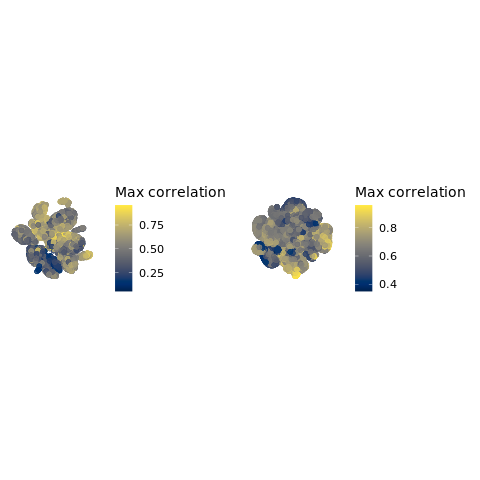

In [75]:
%%R

options(repr.plot.width = 18, repr.plot.height = 8, repr.plot.res = 300)

p1 <- plotNhoodMaxSim(t_milo, t_maxNhoods)
p2 <- plotNhoodMaxSim(o_milo, o_maxNhoods)
grid.arrange(p1,p2,nrow=1)

ggsave("compare_nhoods/comparison_to_fetal_atlas/300723_tissue_oAll_max_corr.pdf", p1, width=10, height=8, dpi=300)
ggsave("compare_nhoods/comparison_to_fetal_atlas/300723_organoid_all_max_corr.pdf", p2, width=10, height=8, dpi=300)

In [76]:
%%R
saveRDS(t_milo, "compare_nhoods/comparison_to_fetal_atlas/t_milo.rds")
saveRDS(o_milo, "compare_nhoods/comparison_to_fetal_atlas/o_milo.rds")

### Annotate regions of high and low correlation with primary tissue on HEOA

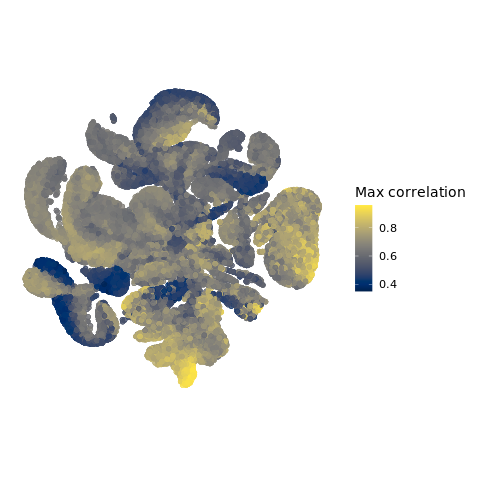

In [77]:
%%R
p2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3511  0.6008  0.6635  0.6542  0.7222  0.9583 


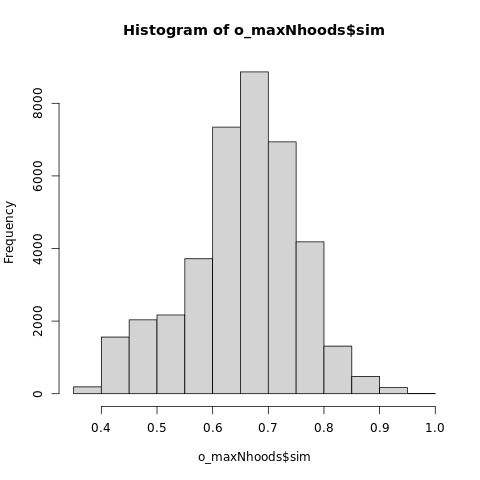

In [78]:
%%R
print(summary(o_maxNhoods$sim))
hist(o_maxNhoods$sim)

In [79]:
%%R
p2 <- plotNhoodMaxSim(o_milo, o_maxNhoods)
ggdat_index_cell_labels = cbind(p2$data, 
                                celltype = as.character(colData(o_milo)$level_2_late[o_maxNhoods$nhoods2]))



In [80]:
%%R
# export?
#  head(cbind(p2$data, celltype = as.character(colData(o_milo)$level_2_late[o_maxNhoods$nhoods2])))

NULL


In [81]:
%%R
head(ggdat_index_cell_labels)

           x         y   name size max_correlation .ggraph.orig_index
1 -0.7455231 16.058235 491647   32       0.5327220                  1
2 -6.6566601 19.404924 521664   39       0.6205702                  2
3  4.0909810 -8.319399 317908   33       0.8407539                  3
4 -4.4084129  1.150307 138869   34       0.4329342                  4
5 -6.0402250 11.137661 295084   38       0.6604468                  5
6  2.2035038 15.121900 586381   31       0.6182040                  6
  .ggraph.index circular                          celltype
1             1    FALSE       alveolar type 1 (AT1) cells
2             2    FALSE                        club cells
3             3    FALSE Interstitial cells of Cajal (ICC)
4             4    FALSE                        stem cells
5             5    FALSE                       enterocytes
6             6    FALSE                       basal cells


In [82]:
%%R
summary(ggdat_index_cell_labels$max_correlation)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3511  0.6008  0.6635  0.6542  0.7222  0.9583 


In [83]:
%%R
ggdat <- ggdat_index_cell_labels[ggdat_index_cell_labels$max_correlation > .8 | ggdat_index_cell_labels$max_correlation < 0.4,]

In [84]:
%%R
#apply a further filter based on frequency of nhoods within a cell type

freqs <- table(ggdat$celltype)
freqs



           airway secretory cells                       alpha cells 
                               24                               525 
      alveolar type 1 (AT1) cells       alveolar type 2 (AT2) cells 
                               35                                40 
                       beta cells                     biliary cells 
                               95                                77 
                   ciliated cells             cycling stromal cells 
                               17                               100 
                      delta cells                      ductal cells 
                               67                                 2 
                      enterocytes                     epsilon cells 
                                2                                42 
                      hepatocytes Interstitial cells of Cajal (ICC) 
                                1                                49 
            lymphatic endothelium

In [85]:
%%R
# ggdat <- ggdat[ggdat$celltype %in% names(freqs)[freqs > 5],]

NULL


In [86]:
%%R
table(ggdat[ ggdat$max_correlation < 0.4,"celltype"])


 biliary cells stellate cells     stem cells 
            77             10            101 


In [87]:
%%R
table(ggdat[ggdat$max_correlation > 0.8,"celltype"])


           airway secretory cells                       alpha cells 
                               24                               525 
      alveolar type 1 (AT1) cells       alveolar type 2 (AT2) cells 
                               35                                40 
                       beta cells                    ciliated cells 
                               95                                17 
            cycling stromal cells                       delta cells 
                              100                                67 
                     ductal cells                       enterocytes 
                                2                                 2 
                    epsilon cells                       hepatocytes 
                               42                                 1 
Interstitial cells of Cajal (ICC)             lymphatic endothelium 
                               49                                 5 
               mesoderm 1 (HAND1)

In [88]:
%%R
head(ggdat)

            x         y   name size max_correlation .ggraph.orig_index
3    4.090981 -8.319399 317908   33       0.8407539                  3
10  -2.554510 -1.913075 416672   32       0.8071470                 10
22  15.375195  2.893938 761058   33       0.8226300                 22
71  -2.269069 -1.267336 426587   32       0.8184962                 71
88  14.005651  6.504484 754099   39       0.8029345                 88
107 16.246943  3.646615 746175   31       0.8509330                107
    .ggraph.index circular                          celltype
3               3    FALSE Interstitial cells of Cajal (ICC)
10             10    FALSE                    stellate cells
22             22    FALSE                       alpha cells
71             71    FALSE                    stellate cells
88             88    FALSE                       alpha cells
107           107    FALSE                       alpha cells


In [89]:
%%R
# how to meaningfully select regions of high and low correlation 
# group by cell type and select nhood with max corr within the cell type


nhood_max_per_celltype = lapply(unique(ggdat$celltype),
                       FUN=function(x){
                           z = ggdat[ggdat$celltype %in% x, ]
                           z[which.max(z$max_correlation),]
                       })



nhood_max_per_celltype_lowcorr = lapply(unique(ggdat$celltype),
                       FUN=function(x){
                           z = ggdat[(ggdat$celltype %in% x), ]
                           z = z[z$max_correlation < 0.4,]
                           z[which.min(z$max_correlation),]
                       })


In [90]:
%%R
nhood_max_per_celltype = do.call(rbind, nhood_max_per_celltype)
nhood_max_per_celltype_lowcorr = do.call(rbind, nhood_max_per_celltype_lowcorr)
nhood_max_per_celltype <- rbind(nhood_max_per_celltype, nhood_max_per_celltype_lowcorr)

In [91]:
%%R
# ggdat_landmark_index_cell <- ggdat_landmark_index_cell[!duplicated(ggdat_landmark_index_cell$celltype),]

nhood_max_per_celltype

                x           y   name size max_correlation .ggraph.orig_index
29707   4.0238843  -9.2727375 315210   35       0.8749728              29707
15086  -3.0700986  -1.8975106 427719   36       0.9074550              15086
18994  16.7255135   2.9300330 755723   38       0.9297851              18994
21245  10.9597321   5.6145039 805550   42       0.8937025              21245
21916   3.4940443 -11.8066092 278338   31       0.9556290              21916
5303    6.8680506  -3.2645545 194467   36       0.8992242               5303
33554  10.5915632  -2.5086350 175457   35       0.9582977              33554
20989 -10.1611109   2.4340184 394891   36       0.3999808              20989
30887   4.8065391   6.1781464 538167   33       0.8669033              30887
29803   0.0515859  -8.5929880 341065   32       0.8675555              29803
29443   1.2370044  -6.4508429 305188   33       0.8697378              29443
3909    1.2720993  18.9831848 476427   36       0.8396782               3909

In [92]:
%%R
nhood_max_per_celltype_lowcorr

               x          y   name size max_correlation .ggraph.orig_index
23367   1.948168 -1.7991946 418336   35       0.3619557              23367
12054 -12.352562  3.2218647 394307   33       0.3510721              12054
23608  -5.118104 -0.2385981 138899   31       0.3565508              23608
      .ggraph.index circular       celltype
23367         23367    FALSE stellate cells
12054         12054    FALSE  biliary cells
23608         23608    FALSE     stem cells


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps 



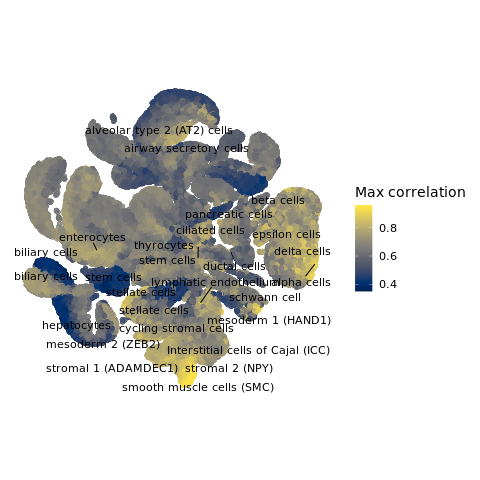

In [93]:
%%R

p2 + geom_text_repel(data = nhood_max_per_celltype, 
                     aes(x= x, y= y, label = celltype))

In [94]:
%%R
nhood_max_per_celltype <- nhood_max_per_celltype[!duplicated(nhood_max_per_celltype),]
p2 <- p2 + geom_text_repel(data = nhood_max_per_celltype, 
                     aes(x= x, y= y, label = celltype), box.padding = 0.95)


In [95]:
%%R
# ggsave("compare_nhoods/comparison_to_fetal_atlas/allfetaltissue_organoid_all_max_corr_annotated_level_2.pdf", p2, width=10, height=8, dpi=300)

NULL


### Annotate regions of high and low correlation with HEOA on Fetal primary tissue reference 

In [96]:
celltypecols = tissue_latent.uns['Main_cluster_name_colors']
derivecols = organoid_gex.uns['derive_colors']
derive_types = organoid_gex.obs.derive.cat.categories
derive = organoid_gex.obs.derive

In [97]:
derivecols

['#E64B35', '#8491B4', '#4DBBD5']

In [98]:
derive_types

Index(['ASC', 'FSC', 'IPS'], dtype='object')

In [99]:
%%R -i celltypecols,derivecols

# highlight epithelial celltypes
# epi_cells = unique(t_milo$new_celltype[t_milo$big_cluster %in% c("C1",'C6')])
# t_milo$isEpi <- ifelse(t_milo$new_celltype %in% epi_cells,"Epithelial", "Non-Epithelial")

names(celltypecols) <- levels(colData(t_milo)$Main_cluster_name)

# make fonts larger - 


p <- plotNhoodSimGroups(t_milo, t_maxNhoods$sim,  group_by="Main_cluster_name",
                        #colour_by="isEpi",
                        xlabel="Correlation - HEOA",
                        ylabel="Celltype (fetal primary tissue)",size=0.15, 
                        group_colours=celltypecols, 
                        rel_min_height=0.001, show_rank = FALSE
                       )

# drop  celltype levels in empty nhoods
stat_summary <- table(p$data$group)
keep <- stat_summary > 5

p$data <- p$data[p$data$group %in% names(stat_summary)[keep],]
p$data$group <- droplevels(p$data$group)

p <- p + 
    scale_color_manual(values=c("orange","black")) + 
    theme(text = element_text(size=12),
          axis.text = element_text(size=20), 
          axis.text.y = element_text(size = 12),
          axis.ticks = element_line(size = 0.8),
          panel.grid.minor = element_line(size = 0.1), 
          panel.grid.major = element_line(size = 0.2)) 
p


ggsave("compare_nhoods/comparison_to_fetal_atlas/300723_ridgeplot_fetalprimaryTissue_HEOA_nhoodCorr_ann_maincluster.pdf", p, width=10, height=12, dpi=300)

Picking joint bandwidth of 0.0425
In addition: Warning message:
The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


Picking joint bandwidth of 0.0425


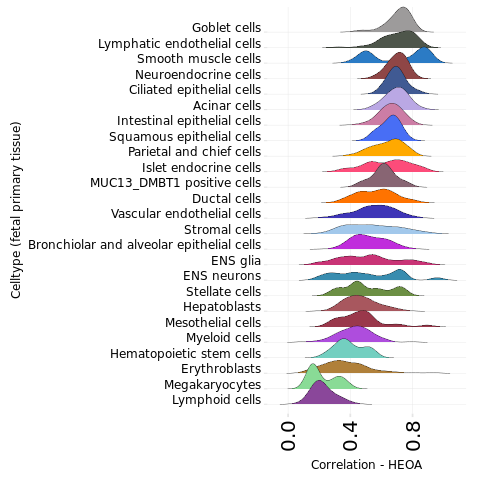

In [100]:
%%R
p

#### Ridge plot colored by tissue



In [101]:
tissuecols = tissue_latent.uns['tissue_colors']

In [102]:
tissuecols

['#91D1C2', '#DC0000', '#B09C85', '#F39B7F', '#8F7700']

In [103]:
%%R
levels(colData(t_milo)$tissue)

[1] "intestine" "stomach"   "pancreas"  "lung"      "liver"    


In [104]:
%%R
dim(p$data)

[1] 4569    4


In [105]:
%%R
derivecols

[1] "#E64B35" "#8491B4" "#4DBBD5"


In [106]:
%%R

print(derivecols)


[1] "#E64B35" "#8491B4" "#4DBBD5"


In [107]:
%%R
levels(colData(o_milo)$derive)

[1] "ASC" "FSC" "IPS"


In [108]:
%%R
head(p$data)

                                        nhood   max_sim
exp3-human-439well.TATGAGAACTTCGGCCTTAC 81025 0.4162876
exp1-human-245.CTCTGAGCTCAACCAGTAC      17270 0.3514180
exp2-human-548_.CAAGCAACTAATGCCGCTT     30500 0.4716839
exp2-human-26_.AATTCTAGGTCTTGGTAATG     24942 0.4140450
exp4-human-13well.TAGTTACCTTACTTGCTAGA  34857 0.5906816
exp1-human-387.GCGGAGAATCCTTGGTCCA      59530 0.6448466
                                                                            group
exp3-human-439well.TATGAGAACTTCGGCCTTAC Bronchiolar and alveolar epithelial cells
exp1-human-245.CTCTGAGCTCAACCAGTAC                     Vascular endothelial cells
exp2-human-548_.CAAGCAACTAATGCCGCTT                                  Hepatoblasts
exp2-human-26_.AATTCTAGGTCTTGGTAATG                                  Hepatoblasts
exp4-human-13well.TAGTTACCTTACTTGCTAGA                  Ciliated epithelial cells
exp1-human-387.GCGGAGAATCCTTGGTCCA      Bronchiolar and alveolar epithelial cells
                                  

In [109]:
%%R
head(t_maxNhoods)

   nhoods1 nhoods2       sim
1:   81025  503887 0.4162876
2:   17270  184803 0.3514180
3:   30500  794735 0.4716839
4:   24942  660231 0.4140450
5:   34857  505311 0.5906816
6:   59530  199487 0.6448466


In [110]:
%%R
colData(t_milo)[48754,]

DataFrame with 1 row and 38 columns
                                    All_reads    Batch Development_day
                                    <integer> <factor>       <integer>
exp1-human-105.TAATCAGCTTATATGAGCCA       399        3             120
                                    Exon_reads Experiment_batch donor_id
                                     <integer>         <factor> <factor>
exp1-human-105.TAATCAGCTTATATGAGCCA        124             exp1   H27098
                                    Intron_reads Main_cluster_name
                                       <integer>          <factor>
exp1-human-105.TAATCAGCTTATATGAGCCA          210     Stromal cells
                                    Organ_cell_lineage    RT_group    batch
                                              <factor>    <factor> <factor>
exp1-human-105.TAATCAGCTTATATGAGCCA Lung-Stromal cells Lung_H27098        0
                                     n_counts
                                    <numeric>
exp1-human-

In [111]:
%%R
colData(o_milo)[290481,]

DataFrame with 1 row and 38 columns
                    initial_size_spliced initial_size_unspliced initial_size
                               <numeric>              <numeric>    <numeric>
GACTATGCAAGGTCAG-89                 8475                   3935         8475
                    n_genes_by_counts total_counts total_counts_mt
                            <integer>    <numeric>       <numeric>
GACTATGCAAGGTCAG-89              3162         9921             274
                    pct_counts_mt total_counts_ribo pct_counts_ribo
                        <numeric>         <numeric>       <numeric>
GACTATGCAAGGTCAG-89       2.76182              2294         23.1227
                    total_counts_hb pct_counts_hb   n_genes
                          <numeric>     <numeric> <numeric>
GACTATGCAAGGTCAG-89              48      0.483822      3162
                                               sample_id     level_1
                                                <factor>    <factor>
GACTATGCAA

In [112]:
%%R
# t_milo$tissue[o_maxNhoods$nhoods2]

NULL


In [113]:
%%R
head(o_maxNhoods)

   nhoods2 nhoods1       sim
1:  491647   78238 0.5327220
2:  521664   39110 0.6205702
3:  317908   88223 0.8407539
4:  138869   54423 0.4329342
5:  295084    9526 0.6604468
6:  586381   92596 0.6182040


In [114]:
%%R
print(dim(o_maxNhoods))
print(dim(t_maxNhoods))

[1] 38961     3
[1] 4577    3


In [115]:
%%R
print(max(o_maxNhoods$nhoods1))
print(max(o_maxNhoods$nhoods2))

[1] 95003
[1] 806597


In [116]:
%%R
t_milo

class: Milo 
dim: 3000 95011 
metadata(3): cell_type_ontology_term_id_colors schema_version title
assays(2): X logcounts
rownames(3000): CXCL10 ARL5C ... CSTA ERMN
rowData names(4): feature_is_filtered feature_name feature_reference
  feature_biotype
colnames(95011): exp7-human-100well.ACAATGCTATACGCGAGATT
  exp7-human-100well.GGTCCTTCTATTCGACCAA ...
  exp7-human-274well.TTCCATCTTTGACCTCTCTG
  exp7-human-274well.CGTCTTCCTGATCGCTTCT
colData names(38): All_reads Batch ... self_reported_ethnicity
  development_stage
reducedDimNames(3): X_global_umap X_main_cluster_umap UMAP
altExpNames(0):
nhoods dimensions(2): 95011 4577
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 4577
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 4577 4577


In [117]:
%%R
o_milo

class: Milo 
dim: 2000 806646 
metadata(9): hvg leiden ... derive_colors tissue_colors
assays(6): X ambiguous ... unspliced logcounts
rownames(2000): ADAMTS9-AS2 BHLHE40-AS1 ... ZNF804A ZWINT
rowData names(6): highly_variable means ... highly_variable_nbatches
  highly_variable_intersection
colnames(806646): AAACCTGAGCCACGTC-0 AAACCTGAGTATGACA-0 ...
  TTTGTTGGTTTCAGGA-1-217 TTTGTTGGTTTCCTCC-1-217
colData names(38): initial_size_spliced initial_size_unspliced ...
  level_2_late level_3_late
reducedDimNames(4): X_scPoli UMAP X_umap_min X_umap_sc
altExpNames(0):
nhoods dimensions(2): 806646 38961
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 38961
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 38961 38961


In [118]:
%%R
colData(t_milo)[32518,]

DataFrame with 1 row and 38 columns
                                       All_reads    Batch Development_day
                                       <integer> <factor>       <integer>
exp3-human-317well.GTAGACGGTAGGAGAGAAC       581        1              94
                                       Exon_reads Experiment_batch donor_id
                                        <integer>         <factor> <factor>
exp3-human-317well.GTAGACGGTAGGAGAGAAC        152             exp3   H27472
                                       Intron_reads Main_cluster_name
                                          <integer>          <factor>
exp3-human-317well.GTAGACGGTAGGAGAGAAC          360     Erythroblasts
                                        Organ_cell_lineage     RT_group
                                                  <factor>     <factor>
exp3-human-317well.GTAGACGGTAGGAGAGAAC Liver-Erythroblasts Liver_H27472
                                          batch  n_counts
                              

In [119]:
%%R
print(derivecols)

[1] "#E64B35" "#8491B4" "#4DBBD5"


In [120]:
%%R
print(table(o_milo$derive[o_maxNhoods$nhoods2]))


  ASC   FSC   IPS 
13830  7812 17319 


In [121]:
%%R
nhood_in_primarytissue <- as.character(t_milo$tissue[o_maxNhoods$nhoods1])
nhood_in_heoa <- as.character(o_milo$tissue[o_maxNhoods$nhoods2])

print(length(nhood_in_primarytissue))
print(length(nhood_in_heoa))
print(sum(nhood_in_primarytissue==nhood_in_heoa))
print(head(nhood_in_heoa))
print(head(nhood_in_primarytissue))

[1] 38961
[1] 38961
[1] 16659
[1] "lung"      "lung"      "intestine" "intestine" "intestine" "lung"     
[1] "lung"      "lung"      "pancreas"  "lung"      "intestine" "stomach"  


In [122]:
%%R
levels(o_milo$tissue)

[1] "biliarysystem" "intestine"     "liver"         "lung"         
[5] "pancreas"      "prostate"      "salivarygland" "stomach"      
[9] "thyroid"      


In [123]:
%%R
levels(t_milo$tissue)

[1] "intestine" "stomach"   "pancreas"  "lung"      "liver"    


In [124]:
%%R
dim(p$data)

[1] 4569    4


Picking joint bandwidth of 0.0177


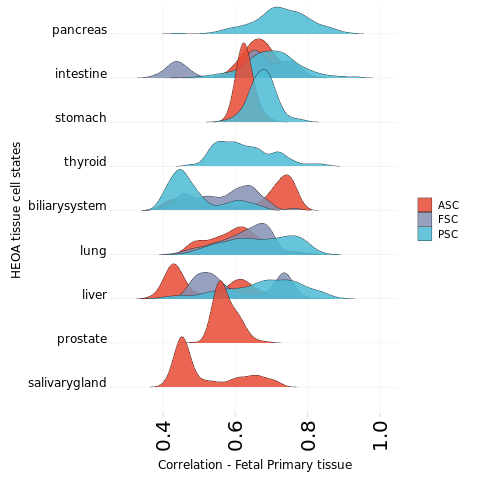

In [125]:
%%R -i tissuecols,derive_types,derive

source('plot_utils.R')

names(tissuecols) <- levels(colData(t_milo)$tissue)


# add information on the stem cell derive type of the index cell of highly correlated nhood
sc_derive_heoa <- o_milo$derive[o_maxNhoods$nhoods2]



derive_types <- gsub('IPS','PSC', derive_types)

names(derivecols) <- derive_types
sc_derive_heoa <- derive[o_maxNhoods$nhoods2]
sc_derive_heoa <- gsub('IPS','PSC', sc_derive_heoa)


p <- plotNhoodSimGroupsAddFill(o_milo, o_maxNhoods$sim,  group_by="tissue",
                        #colour_by="isEpi",
#                         group_fill = factor(sc_derive_heoa, levels = levels(colData(o_milo)$derive)),  
                        group_fill = sc_derive_heoa,       
                        xlabel="Correlation - Fetal Primary tissue",
                        ylabel="HEOA tissue cell states",size=0.15, 
                        group_colours=tissuecols, 
                        group_fill_colours =  derivecols,      
                        rel_min_height=0.001, show_rank = FALSE
                       )

# drop  celltype levels in empty nhoods
stat_summary <- table(p$data$group)
keep <- stat_summary > 5

p$data <- p$data[p$data$group %in% names(stat_summary)[keep],]
p$data$group <- droplevels(p$data$group)

# keep only nhoods that corresponse to nhoods in the same tissue
# p$data <- p$data[nhood_in_primarytissue==nhood_in_heoa,]

p <- p + 
    scale_color_manual(values=c("orange","black")) + 
    theme(text = element_text(size=12),
          axis.text = element_text(size=20), 
          axis.text.y = element_text(size = 12),
          axis.ticks = element_line(size = 0.8),
          panel.grid.minor = element_line(size = 0.1), 
          panel.grid.major = element_line(size = 0.2)) 
    
p

In [126]:
%%R
ggsave("compare_nhoods/comparison_to_fetal_atlas/300723_ridgeplot_fetalprimaryTissue_HEOA_nhoodCorr_ann_tissue_stemDerive_3ridge_wlegend_fixnhoodmapping.pdf", p, width=6, height=8, dpi=300)

Picking joint bandwidth of 0.0177


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


Picking joint bandwidth of 0.0155


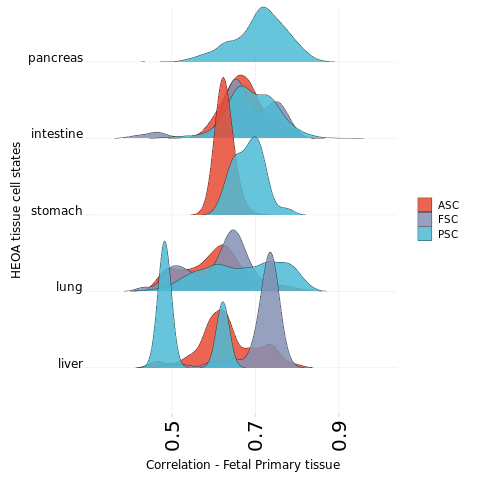

In [127]:
%%R
p$data <- p$data[nhood_in_primarytissue==nhood_in_heoa,]

p <- p + 
    scale_color_manual(values=c("orange","black")) + 
    theme(text = element_text(size=12),
          axis.text = element_text(size=20), 
          axis.text.y = element_text(size = 12),
          axis.ticks = element_line(size = 0.8),
          panel.grid.minor = element_line(size = 0.1), 
          panel.grid.major = element_line(size = 0.2)) 
    
p

In [128]:
%%R
ggsave("compare_nhoods/comparison_to_fetal_atlas/300723_ridgeplot_fetalprimaryTissue_HEOA_nhoodCorr_ann_tissue_stemDerive_3ridge_wlegend_fixnhoodmapping_exclcrosstissuemappingnhoods.pdf", p, width=6, height=8, dpi=300)

Picking joint bandwidth of 0.0155



                             Acinar cells 
                                      119 
Bronchiolar and alveolar epithelial cells 
                                     1120 
               CCL19_CCL21 positive cells 
                                        2 
                         Chromaffin cells 
                                        5 
                Ciliated epithelial cells 
                                       32 
                             Ductal cells 
                                       53 
                                 ENS glia 
                                       39 
                              ENS neurons 
                                       17 
                            Erythroblasts 
                                      438 
                             Goblet cells 
                                       38 
                 Hematopoietic stem cells 
                                       18 
                             Hepatoblasts 
          

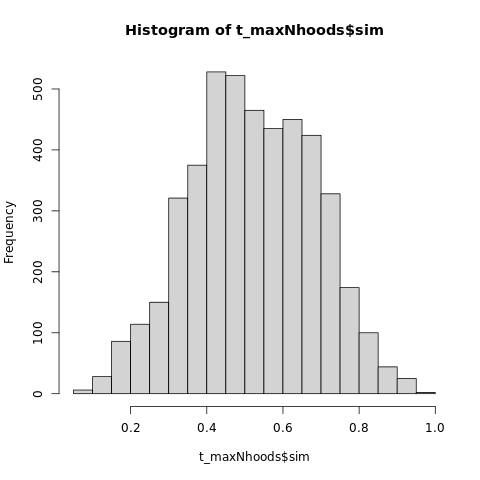

In [129]:
%%R
hist(t_maxNhoods$sim) 
p1 <- plotNhoodMaxSim(t_milo, t_maxNhoods)
           

ggdat_index_cell_labels = cbind(p1$data, 
                                celltype = as.character(colData(t_milo)$Main_cluster_name[t_maxNhoods$nhoods1]))
head(ggdat_index_cell_labels)

ggdat <- ggdat_index_cell_labels

table(ggdat$celltype)

In [130]:
%%R
# subset celltypes based on ridge plots
keep_celltypes <- c(
    # low corrlation
    'Megakaryocytes','Lymphoid cells',
    'Stellate cells','Hematopoietic stem cells',
    'Erythroblasts' , 'Myeloid cells'  ,  'Antigen presenting cells',
    'Smooth muscle cells','Chromaffin cells','Ciliated epithelial cells',
    'Goblet cells'
)

nhood_max_per_celltype = lapply(keep_celltypes,
                       FUN=function(x){
                           z = ggdat[ggdat$celltype %in% x, ]
                           z[which.max(z$max_correlation),]
                       })


In [131]:
%%R
nhood_max_per_celltype = do.call(rbind, nhood_max_per_celltype)

In [132]:
%%R
p1 <- p1 +
 geom_point(data = p1$data, aes(x= x, y= y, color = max_correlation), size =2.5) + 
geom_text_repel(data = nhood_max_per_celltype, size = 5,
                     aes(x= x, y= y, label = celltype),  xlim = c(-Inf, Inf), 
                box.padding = 2, max.overlaps = 50,
               min.segment.length = 0)

#  geom_text_repel(data = nhood_max_per_celltype,
#                  aes(x= x, y= y, label = celltype),
#                  point.padding = 0.5, 
#     nudge_x = .15,
#     nudge_y = .5,
#     segment.linetype = 6,
#     segment.curvature = -1e-20,
#     arrow = arrow(length = unit(0.015, "npc")))
    
# ggsave("compare_nhoods/comparison_to_fetal_atlas/HEOA_nhood_max_corr_with_fetalprimarytissue.pdf", p1, width=9.4, height=12, dpi=300)

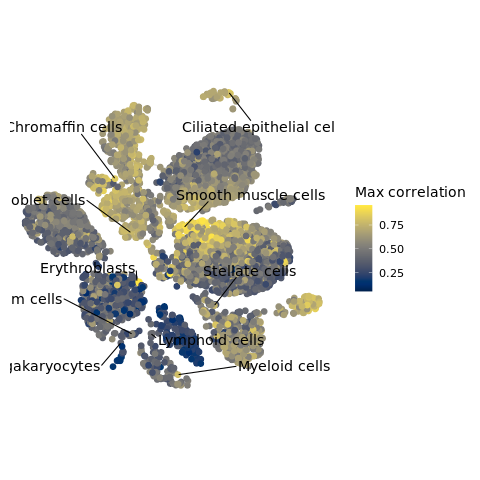

In [133]:
%%R
p1

In [134]:
%%R
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.8 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /home/theislab/l_zadeh/.conda/envs/r_v4/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=C.UTF-8           LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] parallel  stats4    tools     stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ggrepel_0.9.3               ggalluvial_0.12.5          
 [3] ggridges_0.5.4              ggrastr_1.0.2              
 [5] jsonlite_1.8.7              RColorBrewer_1.1-3         
 [7] gridExtra_2.3               viridis_0.6.3              
 [9] v